In [1]:
import matplotlib.pyplot as plt
import wfg
import numpy as np
import rootpath 
import sys
import os
sys.path.append(rootpath.detect())
from testsuite.surrogates import GP, MultiSurrogate
from testsuite.optimisers import *
from testsuite.analysis import load_all

In [2]:
## set up objective function
kfactor = 2
lfactor = 2
n_objectives = 2
n_dims = lfactor * 2 + kfactor

k = kfactor * (n_objectives - 1)
l = lfactor * 2
wfg_n = 6
exec("func = wfg.WFG{}".format(int(wfg_n)))

def wfg2(x):
    if x.ndim == 2:
        assert (x.shape[1] == n_dims)
    else:
        squeezable = np.where([a == 1 for a in x.shape])[0]
        for i in squeezable[::-1]:
            x = x.squeeze(i)

    if x.ndim == 1:
        assert (x.shape[0] == n_dims)
        x = x.reshape(1, -1)
    return np.array([func(xi, k, n_objectives) for xi in x])

In [3]:
N = 500 
y = np.zeros((N, n_objectives))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y[n,:] = func(z, k, n_objectives)


In [4]:
limits = [np.zeros((n_dims)), np.array(range(1, n_dims + 1)) * 2]
gp_surr_multi = MultiSurrogate(GP, scaled=True)
# opt = Saf(objective_function=wfg2, ei=False,  limits=limits, surrogate=gp_surr_multi, n_initial=10, budget=20, seed=None, log_models=True, log_interval=2)
opt = ParEgo(objective_function=wfg2, ei=True, limits=limits, n_initial=10, budget=30, seed=None, log_interval=10)

In [5]:
opt.optimise(n_steps=100)

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Number of scalarising vectors:  6
Optimization restart 1/10, f = 14.189384933541474
Optimization restart 2/10, f = 14.00862585593617
Optimization restart 3/10, f = 14.00862585593648
Optimization restart 4/10, f = 14.008625855965944
Optimization restart 5/10, f = 66.75406265689837
Optimization restart 6/10, f = 14.18938533205181
Optimization restart 7/10, f = 14.189385332046726
Optimization restart 8/10, f = 14.008625855948154
Optimization restart 9/10, f = 14.008625855936458
Optimization restart 10/10, f = 14.189385332046726
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=557336, Fri Sep 18 16:28:28 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -5.397820354136258e-03 1.0e+00 2.91e-01  3e-01  3e-01 0:00.0
    2     18 -6.363895634816454e-03 1.5e+00 3.50e-01  3e-01  4e-01 0:00.0
    3     27 -7.285678644508107e-03 1.5e+00 4.14e-01  4e-01  4e-01 0:00.1
  100    900 -1.952056839823955e-02 8.5e+00 4.36e-04  2e-05  1e-04 0:01.3
  142   127

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:28:30 2020)
final/bestever f-value = -1.952057e-02 -1.952057e-02
incumbent solution: [0.682364920380846, 2.0569259733943612, 2.8857151355180917, 5.686422270791331, 3.032038283945439, 5.8155502327175785]
std deviation: [2.478840442024268e-07, 5.314198742277263e-07, 6.083510539493761e-07, 1.1746580242516934e-06, 1.2651383598192836e-06, 2.1947404786640425e-06]
Optimization restart 1/10, f = 12.615018496197008
Optimization restart 2/10, f = 15.608323865252135
Optimization restart 3/10, f = 12.61501849619636
Optimization restart 4/10, f = 15.6083238652514
Optimization restart 5/10, f = 12.615018496195677
Optimization restart 6/10, f = 12.615018496197912
Optimization restart 7/10, f = 12.61501849619569
Optimization restart 8/10, f = 30.568298943589586
Optimization restart 9/10, f = 15.6083238652514
Optimization restart 10/10, f = 69802082.47517374
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=595104, Fri Sep 18 16:28:31 2020)
Iterat #Feval

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:28:34 2020)
final/bestever f-value = -1.270847e-01 -1.270847e-01
incumbent solution: [2.498568959550665e-13, 2.058994232398961, 3.576959082145471, 6.86962581074497, 1.18601966759872, 4.191286505849999]
std deviation: [3.0571458521171717e-07, 3.559159367579319e-07, 5.600794647973096e-07, 7.432082206875661e-07, 1.0077302300884324e-06, 1.2344491827860863e-06]
Optimization restart 1/10, f = 16.326199065149186
Optimization restart 2/10, f = 17.02726239845668
Optimization restart 3/10, f = 16.326199065121884
Optimization restart 4/10, f = 16.32619906512197
Optimization restart 5/10, f = 16.326199065145264
Optimization restart 6/10, f = 80.10487518827804
Optimization restart 7/10, f = 16.32619906512574
Optimization restart 8/10, f = 17.027262398456074
Optimization restart 9/10, f = 332702346.26426643
Optimization restart 10/10, f = 38.375630952162744
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=544600, Fri Sep 18 16:28:35 2020)
Iterat #Fev

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:28:37 2020)
final/bestever f-value = -7.316949e-03 -7.316949e-03
incumbent solution: [0.6828570605352176, 3.6322758972081544, 2.5405816618461237, 0.7587703161502688, 7.469264261473882, 6.307275122576498]
std deviation: [1.2187178264189842e-06, 2.2476681382678173e-06, 3.2314560877640647e-06, 3.700878685706276e-06, 6.7168673304105805e-06, 9.51705317139748e-06]
Optimization restart 1/10, f = 17.42045794215842
Optimization restart 2/10, f = 17.42045794215894
Optimization restart 3/10, f = 86.78028145396787
Optimization restart 4/10, f = 17.42045794215847
Optimization restart 5/10, f = 17.420457942158414
Optimization restart 6/10, f = 17.420457942158716
Optimization restart 7/10, f = 18.446200931663572
Optimization restart 8/10, f = 17.420457942158453
Optimization restart 9/10, f = 17.420457942160148
Optimization restart 10/10, f = 352242249.2935533
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=627251, Fri Sep 18 16:28:37 2020)
Iterat #Fe

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:28:40 2020)
final/bestever f-value = -1.740051e-02 -1.740051e-02
incumbent solution: [1.9999999999999885, 5.772931076790667e-14, 2.4484551253896782, 3.5717445800314978, 2.682182975260041, 6.871398874427701]
std deviation: [6.361397374910224e-07, 1.0494410480215401e-06, 6.198186399386136e-07, 7.011193667321857e-07, 1.037250135190841e-06, 1.159561745980401e-06]
Optimization restart 1/10, f = 15.847509238898954
Optimization restart 2/10, f = 93.4556877196577
Optimization restart 3/10, f = 15.847509238899104
Optimization restart 4/10, f = 36.23308496580875
Optimization restart 5/10, f = 15.847509238899004
Optimization restart 6/10, f = 15.847509238898954
Optimization restart 7/10, f = 15.847509238899104
Optimization restart 8/10, f = 33.1266919161183
Optimization restart 9/10, f = 15.847509238907305
Optimization restart 10/10, f = 302763512.1644441
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=458049, Fri Sep 18 16:28:41 2020)
Iterat #Fe

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:28:43 2020)
final/bestever f-value = -5.832603e-02 -5.832603e-02
incumbent solution: [1.9999999999999896, 2.6698380035015596e-13, 2.417864964818805, 2.166823341081, 3.4374112773646726, 7.626502985110433]
std deviation: [3.220747910043325e-07, 2.51055727126149e-07, 1.1931140803635437e-06, 1.210903828260992e-06, 1.8913314428779943e-06, 2.0772742336366715e-06]
Optimization restart 1/10, f = 17.682342056801513
Optimization restart 2/10, f = 17.68234205678484
Optimization restart 3/10, f = 285004766.28779507
Optimization restart 4/10, f = 17.682342057106435
Optimization restart 5/10, f = 283990055.9241165
Optimization restart 6/10, f = 17.682342056784986
Optimization restart 7/10, f = 100.13109398533331
Optimization restart 8/10, f = 17.682342056784837
Optimization restart 9/10, f = 100.13109398534753
Optimization restart 10/10, f = 284862907.4522539
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=521496, Fri Sep 18 16:28:44 2020)
Iterat #F

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:28:46 2020)
final/bestever f-value = -5.929757e-02 -5.929757e-02
incumbent solution: [0.6126758381012795, 1.5915463193389576, 3.5978006797369075, 3.383555787762764, 1.015619726733374, 3.356265591095288]
std deviation: [3.2155828199071635e-07, 6.721794358483349e-07, 8.06176551351829e-07, 1.00896663496306e-06, 1.3361174320057784e-06, 1.8705298637966135e-06]
Optimization restart 1/10, f = 16.38418142592552
Optimization restart 2/10, f = 22.703016531276447
Optimization restart 3/10, f = 16.38418142594186
Optimization restart 4/10, f = 16.384181425925025
Optimization restart 5/10, f = 45.80727849742414
Optimization restart 6/10, f = 16.38418142592879
Optimization restart 7/10, f = 22.703016531274763
Optimization restart 8/10, f = 341071581.80979663
Optimization restart 9/10, f = 16.384181425925053
Optimization restart 10/10, f = 106.80650025103739
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=479126, Fri Sep 18 16:28:47 2020)
Iterat #Feva

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:28:49 2020)
final/bestever f-value = -1.369390e-02 -1.369390e-02
incumbent solution: [1.9999999999999032, 0.4049953094045883, 2.3224650041347523, 3.9711692880391176, 1.1914794061337388, 6.957161454108269]
std deviation: [2.8461928996032883e-06, 2.310907482535799e-06, 3.434333456223558e-06, 3.299327273897385e-06, 5.084330550211402e-06, 5.174043588603873e-06]
Optimization restart 1/10, f = 23.524165513825565
Optimization restart 2/10, f = 113.48190651672722
Optimization restart 3/10, f = 24.121955064479433
Optimization restart 4/10, f = 24.1219550639638
Optimization restart 5/10, f = 849068.6197352132
Optimization restart 6/10, f = 23.52416551389313
Optimization restart 7/10, f = 23.524165513825533
Optimization restart 8/10, f = 113.48190651672718
Optimization restart 9/10, f = 113.48190651672722
Optimization restart 10/10, f = 23.52416551382576
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=588330, Fri Sep 18 16:28:50 2020)
Iterat #Fev

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:28:52 2020)
final/bestever f-value = -2.559847e-02 -2.559847e-02
incumbent solution: [0.5204014297809647, 1.9445601741677803, 3.3561517714372275, 5.370164795247231, 2.6561647032519664, 5.069688332540752]
std deviation: [3.263589087507895e-07, 6.117445419994625e-07, 5.368317177767479e-07, 1.2409035353013164e-06, 1.0473729303348482e-06, 1.3873964935169128e-06]
Optimization restart 1/10, f = 18.91458676072763
Optimization restart 2/10, f = 120.15731278241705
Optimization restart 3/10, f = 18.91458676076656
Optimization restart 4/10, f = 47.82805792545311
Optimization restart 5/10, f = 120.15731278241705
Optimization restart 6/10, f = 18.91458676072763
Optimization restart 7/10, f = 25.54089359768553
Optimization restart 8/10, f = 18.91458676072772
Optimization restart 9/10, f = 120.15731278241705
Optimization restart 10/10, f = 120.15731278241705
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=494889, Fri Sep 18 16:28:53 2020)
Iterat #Fev

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:28:55 2020)
final/bestever f-value = -5.545839e-03 -5.545839e-03
incumbent solution: [0.45447454015156696, 2.3794122807971614, 0.727420861854876, 5.502405434748589e-13, 7.054895004795506, 8.336669462283568]
std deviation: [2.0867762862322452e-06, 3.998525621775079e-06, 4.023019945380933e-06, 2.8698632150881417e-06, 9.168621826026476e-06, 9.73716898541458e-06]
Optimization restart 1/10, f = 16.6062599084482
Optimization restart 2/10, f = 16.606259908448173
Optimization restart 3/10, f = 26.959832130888785
Optimization restart 4/10, f = 350506448.7863035
Optimization restart 5/10, f = 16.606259908449175
Optimization restart 6/10, f = 126.8327190481069
Optimization restart 7/10, f = 16.606259908448173
Optimization restart 8/10, f = 26.95983213088888
Optimization restart 9/10, f = 16.606259908448244
Optimization restart 10/10, f = 51.0631972925995
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=592706, Fri Sep 18 16:28:55 2020)
Iterat #Fev

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:28:57 2020)
final/bestever f-value = -8.458533e-03 -8.458533e-03
incumbent solution: [1.34363162457694e-13, 3.9999999999999787, 2.1070741943666813, 2.665008134715048e-13, 5.2199772845179915, 5.854890059195816]
std deviation: [2.1654488623984868e-07, 4.973009167466883e-07, 1.3593172229133714e-06, 9.505539842833758e-07, 2.122215920715217e-06, 3.706658079467671e-06]
Optimization restart 1/10, f = 16.73941396073102
Optimization restart 2/10, f = 16.739413960727873
Optimization restart 3/10, f = 28.378770664093693
Optimization restart 4/10, f = 16.739413960727802
Optimization restart 5/10, f = 133.50812531379674
Optimization restart 6/10, f = 51.5465527666987
Optimization restart 7/10, f = 998904.2585120158
Optimization restart 8/10, f = 16.739413960727827
Optimization restart 9/10, f = 16.73941396135139
Optimization restart 10/10, f = 16.7394139607278
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=534841, Fri Sep 18 16:28:58 2020)
Iterat 

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:29:00 2020)
final/bestever f-value = -2.474707e-02 -2.474707e-02
incumbent solution: [1.9999999999999754, 2.0405339497466105e-15, 3.306954885629904, 3.0629812179507696, 2.6440408865709504, 6.9765288423386895]
std deviation: [3.693798359549244e-07, 5.86807474640045e-07, 4.970236672063643e-07, 1.004407486731464e-06, 1.1449900684203878e-06, 2.041897590086092e-06]
Optimization restart 1/10, f = 22.55593386208141
Optimization restart 2/10, f = 140.18353157948656
Optimization restart 3/10, f = 140.18353157948656
Optimization restart 4/10, f = 22.555933862080703
Optimization restart 5/10, f = 51.46028779807394
Optimization restart 6/10, f = 22.55593386214911
Optimization restart 7/10, f = 140.18353157948656
Optimization restart 8/10, f = 29.797709197298126
Optimization restart 9/10, f = 140.18353157948656
Optimization restart 10/10, f = 51.45947634679656
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=574754, Fri Sep 18 16:29:01 2020)
Iterat 

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:29:03 2020)
final/bestever f-value = -5.147634e-02 -5.147634e-02
incumbent solution: [0.6311071950471537, 1.3301425311453132, 2.9991428684275343, 4.577167420268755, 3.41726102795418, 4.716723312179642]
std deviation: [1.1061352263692756e-07, 2.2419030894872365e-07, 3.1060749389937637e-07, 3.5009987167727653e-07, 5.228827866934466e-07, 5.693891632221535e-07]
Optimization restart 1/10, f = 26.44030612640693
Optimization restart 2/10, f = 31.216647730504604
Optimization restart 3/10, f = 146.85893633778656
Optimization restart 4/10, f = 146.8589378451764
Optimization restart 5/10, f = 26.440306126406863
Optimization restart 6/10, f = 146.8589378451764
Optimization restart 7/10, f = 26.44030612640868
Optimization restart 8/10, f = 26.440306126406742
Optimization restart 9/10, f = 31.21664772836059
Optimization restart 10/10, f = 31.2166477305028
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=492274, Fri Sep 18 16:29:04 2020)
Iterat #Feval

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:29:06 2020)
final/bestever f-value = -1.852136e-02 -1.852136e-02
incumbent solution: [0.6330407349366538, 2.060458785554642, 3.557531202008442, 5.6443440535983616, 3.080120280642265, 6.492515016251104]
std deviation: [5.890107710760969e-07, 8.137894024474501e-07, 5.156711080624908e-07, 1.3495790761895455e-06, 1.4853962726056692e-06, 1.630892900325435e-06]
Optimization restart 1/10, f = 20.877194734547857
Optimization restart 2/10, f = 20.877194734548148
Optimization restart 3/10, f = 32.635586263707474
Optimization restart 4/10, f = 153.53434411086621
Optimization restart 5/10, f = 32.635586263707474
Optimization restart 6/10, f = 32.63558626370748
Optimization restart 7/10, f = 153.53434411086621
Optimization restart 8/10, f = 20.87719473460077
Optimization restart 9/10, f = 20.87719473454899
Optimization restart 10/10, f = 153.53434314946907
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=494891, Fri Sep 18 16:29:07 2020)
Iterat #Fev

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:29:09 2020)
final/bestever f-value = -3.729753e-02 -3.729753e-02
incumbent solution: [0.4356252218759797, 0.6367987984478689, 3.389139934035134, 3.4738788871062436, 2.1929099258260702, 3.7030125932907936]
std deviation: [3.4535566480697857e-07, 6.419847561402197e-07, 9.287959537877165e-07, 1.0543603009484798e-06, 1.2179423413822638e-06, 2.4678049716032347e-06]
Optimization restart 1/10, f = 15.43089433174357
Optimization restart 2/10, f = 15.430894331732627
Optimization restart 3/10, f = 160.2097503765561
Optimization restart 4/10, f = 15.430894331730613
Optimization restart 5/10, f = 34.05452479691214
Optimization restart 6/10, f = 43.18401616118896
Optimization restart 7/10, f = 34.05452479691214
Optimization restart 8/10, f = 15.43089433172884
Optimization restart 9/10, f = 15.430894331729423
Optimization restart 10/10, f = 15.430894331728835
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=542730, Fri Sep 18 16:29:10 2020)
Iterat #F

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:29:12 2020)
final/bestever f-value = -4.141559e-03 -4.141559e-03
incumbent solution: [1.999999999999959, 3.999999999999858, 5.9999999999999485, 1.5858932503803064e-13, 9.999999999999991, 2.703008077441079e-14]
std deviation: [1.0469910830066092e-06, 3.0282934906277096e-06, 1.8528062350787604e-06, 1.2076585934144695e-06, 5.091839094063849e-06, 2.2287153890394063e-06]
Optimization restart 1/10, f = 22.871586781321064
Optimization restart 2/10, f = 601179551.2364138
Optimization restart 3/10, f = 55.45257769635637
Optimization restart 4/10, f = 35.47346333011682
Optimization restart 5/10, f = 52.94105253503568
Optimization restart 6/10, f = 35.473463330116815
Optimization restart 7/10, f = 601696756.2268671
Optimization restart 8/10, f = 166.88515664224593
Optimization restart 9/10, f = 22.87158678131751
Optimization restart 10/10, f = 166.88515664224593
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=491601, Fri Sep 18 16:29:13 2020)
Ite

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:29:15 2020)
final/bestever f-value = -7.602182e-02 -7.602182e-02
incumbent solution: [0.4003346478211123, 0.35642349156899633, 2.855356498043884, 3.8816845033427834, 3.267178212441037, 4.17082718465627]
std deviation: [9.463404906891631e-08, 1.7392361964299199e-07, 2.5758659457779304e-07, 4.773271548180279e-07, 4.587543520518134e-07, 4.864573947775372e-07]
Optimization restart 1/10, f = 22.875756121812415
Optimization restart 2/10, f = 22.87575612181047
Optimization restart 3/10, f = 173.56056290793578
Optimization restart 4/10, f = 22.875756121812273
Optimization restart 5/10, f = 36.89240186332149
Optimization restart 6/10, f = 173.56056290793578
Optimization restart 7/10, f = 66.21840656285575
Optimization restart 8/10, f = 36.892401863321524
Optimization restart 9/10, f = 422684269.2273844
Optimization restart 10/10, f = 173.56056290793578
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=571547, Fri Sep 18 16:29:15 2020)
Iterat #Fev

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:29:18 2020)
final/bestever f-value = -2.554326e-02 -2.554326e-02
incumbent solution: [1.8986376646315215, 0.12544861215658035, 2.7493108649374918, 3.7894226785773686, 3.373009857269216, 6.219031869076157]
std deviation: [1.5966061418207796e-07, 3.3447239136939874e-07, 2.711376205761263e-07, 4.784786467563144e-07, 7.752385841776725e-07, 7.226105744276164e-07]
Optimization restart 1/10, f = 14.370597711302295
Optimization restart 2/10, f = 14.370597711361
Optimization restart 3/10, f = 180.23596917362562
Optimization restart 4/10, f = 14.370597711302246
Optimization restart 5/10, f = 14.370597711302583
Optimization restart 6/10, f = 38.31134039652616
Optimization restart 7/10, f = 38.31134039652617
Optimization restart 8/10, f = 14.370597711302855
Optimization restart 9/10, f = 14.370597711306043
Optimization restart 10/10, f = 14.37059771130237
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=532875, Fri Sep 18 16:29:19 2020)
Iterat #Fev

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:29:21 2020)
final/bestever f-value = -8.205586e-03 -8.205586e-03
incumbent solution: [3.83776849622743e-13, 3.999999999999984, 1.7878762526370773, 3.0965990256724375e-13, 1.4214750858216527, 8.104210876507455]
std deviation: [2.208785360955857e-07, 5.499111382255302e-07, 1.1639832713842328e-06, 5.788890599444517e-07, 2.257806789904835e-06, 1.8527867524367527e-06]
Optimization restart 1/10, f = 15.059825779675295
Optimization restart 2/10, f = 15.059825779678134
Optimization restart 3/10, f = 15.059825779675315
Optimization restart 4/10, f = 15.059825779677453
Optimization restart 5/10, f = 39.730278408458155
Optimization restart 6/10, f = 39.73027892973083
Optimization restart 7/10, f = 39.730278929730844
Optimization restart 8/10, f = 15.059825779675236
Optimization restart 9/10, f = 15.05982577967546
Optimization restart 10/10, f = 1398465.9619168213
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=562136, Fri Sep 18 16:29:22 2020)
It

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:29:24 2020)
final/bestever f-value = -3.160358e-02 -3.160358e-02
incumbent solution: [1.9999999999999893, 3.9964402083720623e-16, 2.850542141187275, 3.5547405667075354, 3.3443203095946323, 8.02830207677562]
std deviation: [1.3789623325041844e-07, 1.370913048677013e-07, 3.2394257712383506e-07, 7.325134202474825e-07, 1.0261374892267161e-06, 9.274242863229045e-07]
Optimization restart 1/10, f = 23.06172305918804
Optimization restart 2/10, f = 23.061723059193213
Optimization restart 3/10, f = 446536231.0738324
Optimization restart 4/10, f = 41.14921746293551
Optimization restart 5/10, f = 41.14921746293551
Optimization restart 6/10, f = 41.14921746293551
Optimization restart 7/10, f = 446639032.1828161
Optimization restart 8/10, f = 41.14921746293552
Optimization restart 9/10, f = 41.14921746293551
Optimization restart 10/10, f = 41.149217462935525
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=520374, Fri Sep 18 16:29:25 2020)
Iterat #Fe

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:29:27 2020)
final/bestever f-value = -8.638646e-03 -8.638646e-03
incumbent solution: [1.8031715680424818, 3.9058120023216003, 4.654092757544071, 1.6286477378644906, 9.521122169490814, 1.2208527233974882]
std deviation: [5.282138921530411e-07, 1.90618342848405e-06, 8.377763172569128e-07, 1.5320265848842209e-06, 2.46752087354715e-06, 2.8086934026122705e-06]
Optimization restart 1/10, f = 14.63179749279162
Optimization restart 2/10, f = 42.568155996140185
Optimization restart 3/10, f = 200.26218797069515
Optimization restart 4/10, f = 521233654.73561156
Optimization restart 5/10, f = 14.63179749279154
Optimization restart 6/10, f = 200.26218797069515
Optimization restart 7/10, f = 14.631797492791444
Optimization restart 8/10, f = 14.631797492793103
Optimization restart 9/10, f = 14.63179749279158
Optimization restart 10/10, f = 42.568155996140185
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=558041, Fri Sep 18 16:29:28 2020)
Iterat #Fev

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:29:31 2020)
final/bestever f-value = -2.869648e-02 -2.869648e-02
incumbent solution: [1.9999999999999893, 1.3343572027056219e-15, 2.709875454085079, 2.947857797646106, 2.854222809481998, 6.815411810235526]
std deviation: [6.719329849891413e-08, 8.725672572409196e-08, 2.174829677731088e-07, 3.345882482055848e-07, 4.918014541145991e-07, 4.4250120979615114e-07]
Optimization restart 1/10, f = 16.465881384788318
Optimization restart 2/10, f = 206.93759423638502
Optimization restart 3/10, f = 43.987094099410314
Optimization restart 4/10, f = 43.987094529344844
Optimization restart 5/10, f = 43.98709446246322
Optimization restart 6/10, f = 16.46588138489447
Optimization restart 7/10, f = 43.98709452934535
Optimization restart 8/10, f = 43.987094529344844
Optimization restart 9/10, f = 43.987094529344844
Optimization restart 10/10, f = 16.465881384738722
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=480523, Fri Sep 18 16:29:32 2020)
Iterat #

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:29:35 2020)
final/bestever f-value = -2.693718e-02 -2.693718e-02
incumbent solution: [1.9999999999999836, 0.32752962928493684, 2.870556813777569, 4.023503575652566, 2.6566090039931547, 6.4964774654287165]
std deviation: [1.8582315131438713e-07, 3.5602774482372447e-07, 2.4004500493819843e-07, 5.5659423768223e-07, 5.114782419308915e-07, 5.016330765133092e-07]
Optimization restart 1/10, f = 21.764773998150787
Optimization restart 2/10, f = 21.764773997906435
Optimization restart 3/10, f = 45.406033062549525
Optimization restart 4/10, f = 45.406033062549525
Optimization restart 5/10, f = 45.4060330625497
Optimization restart 6/10, f = 21.764773997907707
Optimization restart 7/10, f = 45.406033062549525
Optimization restart 8/10, f = 213.61300050207478
Optimization restart 9/10, f = 45.406033062549525
Optimization restart 10/10, f = 213.61300050207478
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=517363, Fri Sep 18 16:29:36 2020)
Iterat #

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:29:38 2020)
final/bestever f-value = -1.237348e-02 -1.237348e-02
incumbent solution: [1.9999999999999822, 0.0711809124422934, 2.8996876233208, 4.298793000320154, 2.6115903240199327, 5.918723274809484]
std deviation: [3.971279257778924e-07, 5.960655557832347e-07, 5.904889244272615e-07, 8.684183544514572e-07, 7.593820358898942e-07, 1.2883733678135265e-06]
Optimization restart 1/10, f = 11.203963418742891
Optimization restart 2/10, f = 220.28840676776463
Optimization restart 3/10, f = 11.20396341874272
Optimization restart 4/10, f = 11.203963418742575
Optimization restart 5/10, f = 11.203963418824504
Optimization restart 6/10, f = 46.8249715957542
Optimization restart 7/10, f = 11.203963418876096
Optimization restart 8/10, f = 46.82497159575421
Optimization restart 9/10, f = 46.82497159575421
Optimization restart 10/10, f = 46.82497159575422
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=540746, Fri Sep 18 16:29:39 2020)
Iterat #Fevals  

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:29:41 2020)
final/bestever f-value = -2.774912e-02 -2.774912e-02
incumbent solution: [1.9999999999999967, 5.441803163190648e-16, 3.2023874877983753, 4.426500043189192, 2.528648421606298, 6.328831886044719]
std deviation: [4.8445939441821543e-08, 6.655601944429689e-08, 2.919551355385405e-07, 5.083432492131413e-07, 3.489068376294824e-07, 4.3266617257916646e-07]
Optimization restart 1/10, f = 9.238914687266078
Optimization restart 2/10, f = 48.24391012895903
Optimization restart 3/10, f = 48.24391012895968
Optimization restart 4/10, f = 9.238914687266291
Optimization restart 5/10, f = 40.522434856361684
Optimization restart 6/10, f = 40.522574436350226
Optimization restart 7/10, f = 226.96381303345447
Optimization restart 8/10, f = 1698137.2394704265
Optimization restart 9/10, f = 48.243910128958866
Optimization restart 10/10, f = 9.23891468726542
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=611236, Fri Sep 18 16:29:42 2020)
Iterat #Fe

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:29:44 2020)
final/bestever f-value = -1.285503e-02 -1.285503e-02
incumbent solution: [1.999999999999914, 8.801036481774789e-14, 4.36937875954428, 7.999999999988769, 0.865006662486933, 4.418560901543691]
std deviation: [2.2905635296391433e-07, 3.4840395129278944e-07, 1.7562602713097701e-06, 5.180651110423974e-06, 5.2765114524029554e-06, 2.858275534247264e-06]
Optimization restart 1/10, f = 20.30234014762331
Optimization restart 2/10, f = 49.66284866216382
Optimization restart 3/10, f = 20.30234014755614
Optimization restart 4/10, f = 49.66284866216353
Optimization restart 5/10, f = 70.14867464726343
Optimization restart 6/10, f = 64.99895607294454
Optimization restart 7/10, f = 20.302340147556148
Optimization restart 8/10, f = 49.66284866216354
Optimization restart 9/10, f = 20.302340147556144
Optimization restart 10/10, f = 70.14867474037584
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=607904, Fri Sep 18 16:29:45 2020)
Iterat #Feval

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:29:48 2020)
final/bestever f-value = -4.188218e-03 -4.188218e-03
incumbent solution: [1.9999999988482722, 3.9999999999850178, 2.1573827490315285, 2.4594184141410875, 9.99999999894232, 3.1849593041229998]
std deviation: [1.1087989630969079e-05, 1.03575376469285e-05, 9.077774728029853e-06, 1.629401964158711e-05, 5.717595325075408e-05, 2.474156876811699e-05]
Optimization restart 1/10, f = 35.77647500699847
Optimization restart 2/10, f = 240.31462556483416
Optimization restart 3/10, f = 35.7764750068668
Optimization restart 4/10, f = 51.081787195369195
Optimization restart 5/10, f = 51.081787195368214
Optimization restart 6/10, f = 35.776475006866164
Optimization restart 7/10, f = 35.776475006866114
Optimization restart 8/10, f = 51.08178719536821
Optimization restart 9/10, f = 51.081787195368236
Optimization restart 10/10, f = 35.77647500689059
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=549052, Fri Sep 18 16:29:49 2020)
Iterat #Feval

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:29:51 2020)
final/bestever f-value = -6.338337e-03 -6.338337e-03
incumbent solution: [2.295962497399426e-13, 1.367540436021198, 6.065803169347974e-12, 1.0695176643017472, 7.401998283059163, 7.443554210133927]
std deviation: [7.865697211794906e-07, 2.4201118094091087e-06, 1.7055953914184922e-06, 5.6611287296543374e-06, 5.0659550491321e-06, 4.2064693912377045e-06]
Optimization restart 1/10, f = 13.577698432355529
Optimization restart 2/10, f = 52.500725728573094
Optimization restart 3/10, f = 13.577698432363135
Optimization restart 4/10, f = 13.577698432372774
Optimization restart 5/10, f = 13.577698432362343
Optimization restart 6/10, f = 246.990031830524
Optimization restart 7/10, f = 13.577698432355568
Optimization restart 8/10, f = 13.577698432360375
Optimization restart 9/10, f = 13.577698432355735
Optimization restart 10/10, f = 13.577698432355572
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=548557, Fri Sep 18 16:29:52 2020)
Ite

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:29:54 2020)
final/bestever f-value = -1.229200e-02 -1.229200e-02
incumbent solution: [1.5916115452124406, 3.999999999999967, 1.8691688796181107, 8.221170900783499e-14, 0.9771596075644315, 8.537127333965678]
std deviation: [1.0402049428836948e-06, 1.3161578602345847e-06, 1.1138733814477286e-06, 7.232797596840677e-07, 3.5591608606350024e-06, 2.7018076981296154e-06]
Optimization restart 1/10, f = 14.921936269203965
Optimization restart 2/10, f = 14.921936269208011
Optimization restart 3/10, f = 65.67813771308917
Optimization restart 4/10, f = 14.921936269197115
Optimization restart 5/10, f = 53.91966370037611
Optimization restart 6/10, f = 253.66543809621388
Optimization restart 7/10, f = 14.921936269209652
Optimization restart 8/10, f = 14.92193626920269
Optimization restart 9/10, f = 53.919664261777555
Optimization restart 10/10, f = 1897918.091172829
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=544058, Fri Sep 18 16:29:55 2020)
Iter

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:29:57 2020)
final/bestever f-value = -4.101882e-03 -4.101882e-03
incumbent solution: [2.198736278683899e-13, 3.9999999999998552, 2.698203652321861, 6.140516913946211e-13, 9.999999999999327, 3.755843134911293e-12]
std deviation: [5.328821435964458e-07, 1.6951120648008898e-06, 5.197168979135554e-06, 1.358687052014995e-06, 5.878429303572868e-06, 2.4070899447150294e-06]
Optimization restart 1/10, f = 37.96376667568357
Optimization restart 2/10, f = 37.96376667571113
Optimization restart 3/10, f = 55.33860279498228
Optimization restart 4/10, f = 1507950119.8186107
Optimization restart 5/10, f = 55.33860279498223
Optimization restart 6/10, f = 55.33860279498228
Optimization restart 7/10, f = 37.96376667567591
Optimization restart 8/10, f = 37.963766675676
Optimization restart 9/10, f = 260.34084436190375
Optimization restart 10/10, f = 37.96376667567591
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=496667, Fri Sep 18 16:29:58 2020)
Iterat 

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:30:00 2020)
final/bestever f-value = -1.894901e-02 -1.894901e-02
incumbent solution: [0.48781961739750557, 2.514656431178267, 3.268287623049797, 5.758941554305183, 3.7031254419188215, 5.7464992037444755]
std deviation: [4.917970066745266e-07, 9.107583659481898e-07, 6.850550794493077e-07, 1.2789694890797714e-06, 1.8717742050215194e-06, 1.3097469776769313e-06]
Optimization restart 1/10, f = 30.37768028818505
Optimization restart 2/10, f = 1143423676.1331077
Optimization restart 3/10, f = 30.377680288171064
Optimization restart 4/10, f = 56.75754132818691
Optimization restart 5/10, f = 56.75754132818691
Optimization restart 6/10, f = 56.7575413281869
Optimization restart 7/10, f = 1145482405.5545995
Optimization restart 8/10, f = 30.37768028817383
Optimization restart 9/10, f = 30.37768028817137
Optimization restart 10/10, f = 30.377680288195602
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=602799, Fri Sep 18 16:30:01 2020)
Iterat #Feva

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:30:03 2020)
final/bestever f-value = -3.793701e-02 -3.793701e-02
incumbent solution: [0.4542725306702744, 0.8048229601992214, 3.169869257835055, 4.280699837137408, 2.828932807549217, 5.102726963560056]
std deviation: [8.036687876124396e-08, 1.3489438200617712e-07, 1.3782526687629766e-07, 1.9708962644352429e-07, 2.5187493557377657e-07, 4.0938639772326883e-07]
Optimization restart 1/10, f = 26.241069005280558
Optimization restart 2/10, f = 26.241069005280423
Optimization restart 3/10, f = 26.241069005281894
Optimization restart 4/10, f = 26.24106900528986
Optimization restart 5/10, f = 26.241069005280988
Optimization restart 6/10, f = 1087343047.6150465
Optimization restart 7/10, f = 1089981476.6136477
Optimization restart 8/10, f = 1090111793.7551599
Optimization restart 9/10, f = 26.241069005280597
Optimization restart 10/10, f = 26.241069005280313
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=606129, Fri Sep 18 16:30:04 2020)
Iterat

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:30:07 2020)
final/bestever f-value = -4.222856e-02 -4.222856e-02
incumbent solution: [0.2695279972905564, 0.41282847434242587, 3.1998210795006488, 3.923535572197708, 2.828865739049904, 4.8582408982973355]
std deviation: [3.687946343249778e-07, 4.951079672620668e-07, 4.3398173358725987e-07, 9.736522749598863e-07, 7.758072357191079e-07, 1.1884155629249323e-06]
Optimization restart 1/10, f = 23.99923590438214
Optimization restart 2/10, f = 280.36706315897317
Optimization restart 3/10, f = 23.99923590438145
Optimization restart 4/10, f = 280.36706315897317
Optimization restart 5/10, f = 23.999235904386296
Optimization restart 6/10, f = 59.595418394596244
Optimization restart 7/10, f = 23.999235904382914
Optimization restart 8/10, f = 59.59541839459625
Optimization restart 9/10, f = 59.59541839459625
Optimization restart 10/10, f = 23.9992359043815
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=540582, Fri Sep 18 16:30:08 2020)
Iterat #Fev

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:30:10 2020)
final/bestever f-value = -4.555938e-02 -4.555938e-02
incumbent solution: [5.001241516450438e-12, 0.12640484876498656, 3.348025416567922, 3.6776388054105853, 2.8041379653095437, 5.135449622837954]
std deviation: [9.300566046028198e-07, 3.6798534277992437e-07, 4.106610163513718e-07, 6.365416900354341e-07, 1.0254888037387475e-06, 9.140224025052079e-07]
Optimization restart 1/10, f = 14.477738246538706
Optimization restart 2/10, f = 1043770806.479146
Optimization restart 3/10, f = 61.01435692780093
Optimization restart 4/10, f = 61.014356927800925
Optimization restart 5/10, f = 61.0143569274577
Optimization restart 6/10, f = 61.01435692780127
Optimization restart 7/10, f = 61.014356927801344
Optimization restart 8/10, f = 14.477738246545922
Optimization restart 9/10, f = 61.01435692780173
Optimization restart 10/10, f = 61.01435692780106
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=476553, Fri Sep 18 16:30:11 2020)
Iterat #F

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:30:13 2020)
final/bestever f-value = -1.459270e-02 -1.459270e-02
incumbent solution: [1.9999999999998759, 1.251155815637178e-13, 3.1783559357572493, 1.9524595678065042, 5.380720753499125, 7.406474148167593]
std deviation: [3.5994032934298594e-07, 4.0251860522906106e-07, 9.434268699776976e-07, 1.708554467825631e-06, 2.006515056058598e-06, 1.9056008353899962e-06]
Optimization restart 1/10, f = 14.418530694154107
Optimization restart 2/10, f = 293.7178756903529
Optimization restart 3/10, f = 1033980536.1216146
Optimization restart 4/10, f = 14.41853069414978
Optimization restart 5/10, f = 62.4332954610056
Optimization restart 6/10, f = 14.418530694149727
Optimization restart 7/10, f = 14.418530694150306
Optimization restart 8/10, f = 2197589.368726434
Optimization restart 9/10, f = 62.4332954610056
Optimization restart 10/10, f = 14.41853069414962
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=510585, Fri Sep 18 16:30:14 2020)
Iterat #Fe

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:30:16 2020)
final/bestever f-value = -1.606636e-02 -1.606636e-02
incumbent solution: [1.9999999999999172, 1.8602164018644317e-14, 3.2611070432240084, 0.4025562081206264, 4.4534536205020805, 9.074406469612807]
std deviation: [7.669219186456595e-07, 6.657943980119086e-07, 1.4766156385240849e-06, 3.2249630176040578e-06, 3.549618754132931e-06, 4.407968103435855e-06]
Optimization restart 1/10, f = 24.93589110708965
Optimization restart 2/10, f = 771313907.8671598
Optimization restart 3/10, f = 63.852233994210266
Optimization restart 4/10, f = 63.85223399421028
Optimization restart 5/10, f = 24.935891107089653
Optimization restart 6/10, f = 63.85223399421132
Optimization restart 7/10, f = 300.3932819560427
Optimization restart 8/10, f = 771829856.022509
Optimization restart 9/10, f = 2247534.5816520345
Optimization restart 10/10, f = 24.935891107090118
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=527381, Fri Sep 18 16:30:17 2020)
Iterat #

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:30:19 2020)
final/bestever f-value = -9.727252e-03 -9.727252e-03
incumbent solution: [1.999999999999998, 2.5285052980295607e-12, 2.7312499230360263, 1.7264258445574148, 6.962332425320819, 6.462530511315968]
std deviation: [2.717147520728524e-07, 8.818286793467852e-07, 8.582763211119011e-07, 1.1906990690878314e-06, 1.8658630002763335e-06, 1.4339246398455359e-06]
Optimization restart 1/10, f = 24.32380726827955
Optimization restart 2/10, f = 986945686.0749998
Optimization restart 3/10, f = 24.32380726827964
Optimization restart 4/10, f = 307.0686882217325
Optimization restart 5/10, f = 65.27117252741493
Optimization restart 6/10, f = 24.323807268279925
Optimization restart 7/10, f = 988017374.3336124
Optimization restart 8/10, f = 65.27117252741495
Optimization restart 9/10, f = 24.32380726827979
Optimization restart 10/10, f = 65.27117252741493
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=575999, Fri Sep 18 16:30:20 2020)
Iterat #Fev

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:30:23 2020)
final/bestever f-value = -1.974290e-02 -1.974290e-02
incumbent solution: [8.89308952314387e-15, 3.339902268756955e-17, 3.5796809025609413, 3.3035318790133457, 3.1734038024245064, 5.482994013991424]
std deviation: [8.082905889297899e-08, 1.8942902743564592e-07, 2.1929090536235567e-07, 4.788663989533523e-07, 6.598259651886147e-07, 4.087852568266533e-07]
Optimization restart 1/10, f = 13.753688615037973
Optimization restart 2/10, f = 66.69011106061964
Optimization restart 3/10, f = 13.753688615028114
Optimization restart 4/10, f = 13.753688615028352
Optimization restart 5/10, f = 13.753688615027965
Optimization restart 6/10, f = 13.753688615065577
Optimization restart 7/10, f = 13.75368861502789
Optimization restart 8/10, f = 13.753688615027887
Optimization restart 9/10, f = 313.74409448742233
Optimization restart 10/10, f = 13.753688615027745
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=550795, Fri Sep 18 16:30:24 2020)
It

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:30:26 2020)
final/bestever f-value = -1.988665e-02 -1.988665e-02
incumbent solution: [3.1623844658029227e-15, 3.999999999999975, 2.3232905203849015, 3.7121673276695114e-11, 4.238501598323777, 8.616310064884876]
std deviation: [1.694065992922045e-07, 3.756651894550815e-07, 4.919626988690574e-07, 2.7279046140138013e-06, 1.126333389116202e-06, 1.1656017464855234e-06]
Optimization restart 1/10, f = 25.614815997742465
Optimization restart 2/10, f = 68.1090495938243
Optimization restart 3/10, f = 86.43959317468322
Optimization restart 4/10, f = 86.43959324638655
Optimization restart 5/10, f = 68.10904959382466
Optimization restart 6/10, f = 25.614815997338056
Optimization restart 7/10, f = 68.10904959382428
Optimization restart 8/10, f = 25.614815997286442
Optimization restart 9/10, f = 982477150.9837028
Optimization restart 10/10, f = 25.614815997286367
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=509134, Fri Sep 18 16:30:27 2020)
Iterat

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:30:29 2020)
final/bestever f-value = -2.729149e-02 -2.729149e-02
incumbent solution: [1.0242710442325194e-11, 0.13140475295784282, 3.53004904693464, 3.0442978709146633, 3.098874370112531, 3.8411329590458045]
std deviation: [1.9812978968118912e-06, 4.3364572746962173e-07, 4.5362396452379193e-07, 7.155666884806542e-07, 9.537264193894938e-07, 8.121448151973518e-07]
Optimization restart 1/10, f = 13.029807978467268
Optimization restart 2/10, f = 69.52798812702896
Optimization restart 3/10, f = 327.09489864259103
Optimization restart 4/10, f = 69.52798812702896
Optimization restart 5/10, f = 13.029807978467716
Optimization restart 6/10, f = 13.029807978466934
Optimization restart 7/10, f = 13.029807978468408
Optimization restart 8/10, f = 13.029807978467133
Optimization restart 9/10, f = 13.02980797855929
Optimization restart 10/10, f = 69.2928493268441
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=569076, Fri Sep 18 16:30:30 2020)
Iterat

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:30:33 2020)
final/bestever f-value = -9.925203e-03 -9.925203e-03
incumbent solution: [4.3425943556123177e-16, 3.999999999999955, 2.953428949100015, 3.0416104356786295, 9.999999999999487, 4.599581857568438e-14]
std deviation: [2.4581832223524896e-07, 6.990546431448625e-07, 2.9487603499862916e-06, 1.9534581100201923e-06, 2.179810502732677e-06, 1.0822806099997113e-06]
Optimization restart 1/10, f = 43.036381203412446
Optimization restart 2/10, f = 70.94692666023366
Optimization restart 3/10, f = 43.03638120340828
Optimization restart 4/10, f = 70.94692666023387
Optimization restart 5/10, f = 70.94692666023371
Optimization restart 6/10, f = 70.94692666023428
Optimization restart 7/10, f = 104.55694557381966
Optimization restart 8/10, f = 43.03638120341002
Optimization restart 9/10, f = 70.94692666023363
Optimization restart 10/10, f = 43.036381203408446
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=523163, Fri Sep 18 16:30:34 2020)
Itera

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:30:36 2020)
final/bestever f-value = -2.618284e-02 -2.618284e-02
incumbent solution: [0.754885822158085, 1.8008826698165972, 3.661283709879917, 5.159897350864101, 3.0257593940027614, 5.734563382690951]
std deviation: [1.3081033542024787e-07, 1.5852519801534996e-07, 2.142113896642925e-07, 2.943848309527114e-07, 5.09238608086231e-07, 3.285397868132462e-07]
Optimization restart 1/10, f = 6.860090351627818
Optimization restart 2/10, f = 340.4457195501816
Optimization restart 3/10, f = 72.36586519343923
Optimization restart 4/10, f = 6.860090351628273
Optimization restart 5/10, f = 340.4457195501816
Optimization restart 6/10, f = 72.3658651934383
Optimization restart 7/10, f = 6.8600903516300455
Optimization restart 8/10, f = 72.36586519343831
Optimization restart 9/10, f = 6.860090351628003
Optimization restart 10/10, f = 72.3658651934383
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=449262, Fri Sep 18 16:30:38 2020)
Iterat #Fevals   fun

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:30:40 2020)
final/bestever f-value = -1.780836e-02 -1.780836e-02
incumbent solution: [1.9999999999999762, 1.9578954608654103e-14, 4.215309201293479, 0.48099543024431274, 9.999999999999975, 8.49831033238327]
std deviation: [2.1458840587872673e-07, 2.2739687811430282e-07, 8.627163411035377e-07, 3.0256544653894734e-06, 2.793995749857724e-06, 2.6780964026232355e-06]
Optimization restart 1/10, f = 20.04592326491934
Optimization restart 2/10, f = 20.045923264822918
Optimization restart 3/10, f = 86.37997339872169
Optimization restart 4/10, f = 86.37997312763486
Optimization restart 5/10, f = 20.045923264823216
Optimization restart 6/10, f = 347.12112581587144
Optimization restart 7/10, f = 73.78480372664296
Optimization restart 8/10, f = 20.04592326482625
Optimization restart 9/10, f = 73.78480372664303
Optimization restart 10/10, f = 73.78480372664298
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=483302, Fri Sep 18 16:30:41 2020)
Iterat #

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:30:43 2020)
final/bestever f-value = -1.064752e-04 -1.064752e-04
incumbent solution: [1.9999999999966456, 3.9999999999974443, 8.514173487732204e-11, 7.999999999990392, 8.450681065626146e-10, 1.0860285729294348e-11]
std deviation: [5.789337339678107e-06, 1.295345686843417e-05, 3.415739529526398e-06, 1.6476176479658804e-05, 1.7044919768521872e-05, 6.533768016734267e-06]
Optimization restart 1/10, f = 47.76911131791124
Optimization restart 2/10, f = 47.76911131790797
Optimization restart 3/10, f = 75.20374225984766
Optimization restart 4/10, f = 119.74272580258616
Optimization restart 5/10, f = 47.76911131790787
Optimization restart 6/10, f = 75.20374225985026
Optimization restart 7/10, f = 47.76911131790796
Optimization restart 8/10, f = 353.7965320815613
Optimization restart 9/10, f = 47.76911131796281
Optimization restart 10/10, f = 353.7965320815613
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=516887, Fri Sep 18 16:30:44 2020)
Iter

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:30:46 2020)
final/bestever f-value = -2.487540e-02 -2.487540e-02
incumbent solution: [0.33439749580730854, 1.672080179135267, 3.5588997527459862, 5.251076639188678, 3.473922339546959, 6.111005504899572]
std deviation: [1.299463830702177e-07, 2.340792236895878e-07, 3.391219021399972e-07, 4.598379600440753e-07, 5.183239538616841e-07, 6.071269996207126e-07]
Optimization restart 1/10, f = 25.333173117664046
Optimization restart 2/10, f = 1166864431.7010486
Optimization restart 3/10, f = 25.333173117682957
Optimization restart 4/10, f = 76.6226807930528
Optimization restart 5/10, f = 25.33317311766342
Optimization restart 6/10, f = 76.62268071641955
Optimization restart 7/10, f = 25.333173117663023
Optimization restart 8/10, f = 360.471938341794
Optimization restart 9/10, f = 2697041.4979824414
Optimization restart 10/10, f = 76.62268079305261
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=558421, Fri Sep 18 16:30:47 2020)
Iterat #Fevals  

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:30:49 2020)
final/bestever f-value = -2.205296e-02 -2.205296e-02
incumbent solution: [0.5278424708272196, 0.6571281609545071, 3.219811231553426, 3.9240878870483407, 3.071964697533004, 4.305787816705243]
std deviation: [1.4875985895057225e-07, 2.537191727836193e-07, 2.4877953813906587e-07, 3.813678893522827e-07, 5.222253558626912e-07, 5.034678114361157e-07]
Optimization restart 1/10, f = 10.76290591050578
Optimization restart 2/10, f = 367.14734461294086
Optimization restart 3/10, f = 367.14734461294086
Optimization restart 4/10, f = 10.762905910608769
Optimization restart 5/10, f = 1338935931.3122256
Optimization restart 6/10, f = 77.6193741977888
Optimization restart 7/10, f = 78.041619326257
Optimization restart 8/10, f = 1340327508.1839511
Optimization restart 9/10, f = 367.1473383320866
Optimization restart 10/10, f = 78.04161932625699
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=522033, Fri Sep 18 16:30:50 2020)
Iterat #Fevals 

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:30:52 2020)
final/bestever f-value = -8.894854e-03 -8.894854e-03
incumbent solution: [6.795604036085161e-14, 3.9999999999998828, 4.644525695929109, 6.367308525560421, 9.999999999999886, 9.035439630792922e-14]
std deviation: [3.4828717291473975e-07, 8.249875224346732e-07, 1.2162892370941243e-06, 3.8056007177707525e-06, 2.715293502173729e-06, 3.1078330600017027e-06]
Optimization restart 1/10, f = 11.392671395945513
Optimization restart 2/10, f = 2796931.923833644
Optimization restart 3/10, f = 11.392671395783758
Optimization restart 4/10, f = 11.392671395784191
Optimization restart 5/10, f = 79.46055785946167
Optimization restart 6/10, f = 11.392671395783466
Optimization restart 7/10, f = 11.39267139578358
Optimization restart 8/10, f = 11.392671395783886
Optimization restart 9/10, f = 78.74850155979911
Optimization restart 10/10, f = 11.392671395784038
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=488156, Fri Sep 18 16:30:54 2020)
Ite

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:30:56 2020)
final/bestever f-value = -8.360542e-03 -8.360542e-03
incumbent solution: [1.9999999999987548, 7.631675598369947e-14, 2.4775871158426863, 0.959750929311782, 1.8485386271854398e-13, 11.999999999999998]
std deviation: [8.766810806500382e-07, 4.1681592176122716e-07, 1.8631189128676624e-06, 3.483267518972068e-06, 1.458202605426666e-06, 8.25626740773334e-06]
Optimization restart 1/10, f = 6.420642760050576
Optimization restart 2/10, f = 6.420642760048096
Optimization restart 3/10, f = 80.87949639266634
Optimization restart 4/10, f = 6.420642760047869
Optimization restart 5/10, f = 6.420642760046981
Optimization restart 6/10, f = 6.420642760048892
Optimization restart 7/10, f = 80.87949639266634
Optimization restart 8/10, f = 6.420642760048338
Optimization restart 9/10, f = 6.420642760048857
Optimization restart 10/10, f = 6.420642760047578
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=576367, Fri Sep 18 16:30:58 2020)
Iterat #F

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:31:01 2020)
final/bestever f-value = -1.524625e-02 -1.524625e-02
incumbent solution: [1.9795498582276168e-14, 3.9999999999993365, 5.999999999999215, 7.999999999999554, 9.999999999999897, 5.937183050020414e-14]
std deviation: [5.131275470219056e-07, 1.132405946942542e-06, 1.0983426043769029e-06, 1.6174451616614751e-06, 3.503187516041712e-06, 1.1677776002701873e-06]
Optimization restart 1/10, f = 11.603939878205676
Optimization restart 2/10, f = 82.29843492587099
Optimization restart 3/10, f = 82.298434925871
Optimization restart 4/10, f = 11.60393987821669
Optimization restart 5/10, f = 82.298434925871
Optimization restart 6/10, f = 2896822.349684844
Optimization restart 7/10, f = 1777953554.4097571
Optimization restart 8/10, f = 11.603939878203075
Optimization restart 9/10, f = 11.603939878206816
Optimization restart 10/10, f = 387.17356341001044
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=500161, Fri Sep 18 16:31:02 2020)
Iterat #

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:31:04 2020)
final/bestever f-value = -1.767457e-02 -1.767457e-02
incumbent solution: [1.9999999999999998, 3.643426447782923e-14, 3.7426545195932417, 8.583608851062098e-13, 8.04229141604295, 6.199934304769269]
std deviation: [1.3038673280480772e-07, 9.793995186235598e-08, 3.599836572263044e-07, 5.196117329966681e-07, 8.902507900501012e-07, 9.702896405512926e-07]
Optimization restart 1/10, f = 50.435436030339474
Optimization restart 2/10, f = 83.7173734590757
Optimization restart 3/10, f = 83.7173734590757
Optimization restart 4/10, f = 83.71737345907569
Optimization restart 5/10, f = 83.7173734590757
Optimization restart 6/10, f = 83.7173734590757
Optimization restart 7/10, f = 83.71737345907574
Optimization restart 8/10, f = 393.8489696757003
Optimization restart 9/10, f = 50.435436030339645
Optimization restart 10/10, f = 83.71737345907582
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=537030, Fri Sep 18 16:31:05 2020)
Iterat #Fevals

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:31:07 2020)
final/bestever f-value = -1.716816e-02 -1.716816e-02
incumbent solution: [0.7282420328839152, 1.8622410207149334, 2.8757402347383225, 5.983734489715225, 2.291912363175769, 6.417599287526512]
std deviation: [1.4243097585020374e-07, 3.311477818854673e-07, 3.0826143690905297e-07, 6.798139155693769e-07, 6.850561322875482e-07, 1.0658261351297854e-06]
Optimization restart 1/10, f = 27.067778796166788
Optimization restart 2/10, f = 27.0677787961666
Optimization restart 3/10, f = 85.13631199228035
Optimization restart 4/10, f = 27.067778796166476
Optimization restart 5/10, f = 27.067778796166067
Optimization restart 6/10, f = 2996712.775536047
Optimization restart 7/10, f = 85.13631199228037
Optimization restart 8/10, f = 85.13631199228037
Optimization restart 9/10, f = 27.067778796165967
Optimization restart 10/10, f = 105.38668758615549
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=488788, Fri Sep 18 16:31:09 2020)
Iterat #Feva

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:31:11 2020)
final/bestever f-value = -6.904573e-03 -6.904573e-03
incumbent solution: [1.0479644376503368, 3.978773215637818, 5.604835126182533, 6.972699941624068, 9.469927531183982, 1.2869995132367846]
std deviation: [6.966970480421776e-07, 7.656055082257036e-06, 1.690524800009404e-06, 2.7420235115422015e-06, 3.991516769821983e-06, 4.087949307895303e-06]
Optimization restart 1/10, f = 24.939463696628707
Optimization restart 2/10, f = 407.1997822070799
Optimization restart 3/10, f = 24.939463696625268
Optimization restart 4/10, f = 24.939463696624763
Optimization restart 5/10, f = 24.93946369662552
Optimization restart 6/10, f = 24.939463696625634
Optimization restart 7/10, f = 86.55525052548504
Optimization restart 8/10, f = 86.55525052548504
Optimization restart 9/10, f = 24.939463696629065
Optimization restart 10/10, f = 24.93946369662533
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=576237, Fri Sep 18 16:31:12 2020)
Iterat #Fevals

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:31:15 2020)
final/bestever f-value = -2.258815e-02 -2.258815e-02
incumbent solution: [0.08057742218835431, 1.1019290136549966e-13, 3.3589948030974695, 2.972959599396967, 2.1469255041177093, 4.404943555473085]
std deviation: [1.6026011767717956e-07, 3.9163518467930187e-07, 4.853709567718197e-07, 5.407463321312023e-07, 8.10713255246035e-07, 7.104637444512286e-07]
Optimization restart 1/10, f = 4.5766072982451895
Optimization restart 2/10, f = 413.87518847276976
Optimization restart 3/10, f = 4.576607298249101
Optimization restart 4/10, f = 4.576607298245939
Optimization restart 5/10, f = 4.576607298249101
Optimization restart 6/10, f = 4.576607298247353
Optimization restart 7/10, f = 413.87518842078487
Optimization restart 8/10, f = 4.576607298249478
Optimization restart 9/10, f = 87.97418905868972
Optimization restart 10/10, f = 413.87518847276976
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=470756, Fri Sep 18 16:31:16 2020)
Iterat #

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:31:21 2020)
final/bestever f-value = -5.383281e-03 -5.383281e-03
incumbent solution: [1.999999999999987, 9.17247923582913e-14, 5.999999999999234, 2.9542949364443922, 9.999999999999902, 1.4618818335583086e-12]
std deviation: [5.532725092566039e-07, 4.2976596394968226e-07, 2.7393281932656785e-06, 5.891474885831175e-06, 3.180321733350823e-06, 7.831556045733877e-07]
Optimization restart 1/10, f = 24.089153636027465
Optimization restart 2/10, f = 24.0891536360206
Optimization restart 3/10, f = 89.39312759189438
Optimization restart 4/10, f = 104.71542243561854
Optimization restart 5/10, f = 1348870921.2925904
Optimization restart 6/10, f = 104.71507918654649
Optimization restart 7/10, f = 89.39312759189437
Optimization restart 8/10, f = 24.08915363602702
Optimization restart 9/10, f = 89.39312759189438
Optimization restart 10/10, f = 89.39312759189438
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=542874, Fri Sep 18 16:31:22 2020)
Iterat #

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:31:24 2020)
final/bestever f-value = -1.880406e-02 -1.880406e-02
incumbent solution: [0.30911387325416273, 0.5644180945116718, 2.8290559567690847, 3.8089652006312242, 2.7524992115804774, 3.8002956539955846]
std deviation: [1.905318258707325e-07, 2.714875733692477e-07, 3.621916164077991e-07, 5.740017635827297e-07, 5.591047332919139e-07, 7.686867714175567e-07]
Optimization restart 1/10, f = 3.059894880617776
Optimization restart 2/10, f = 3.05989488061455
Optimization restart 3/10, f = 3.0598948806159854
Optimization restart 4/10, f = 62.532882072260115
Optimization restart 5/10, f = 3.059894880613271
Optimization restart 6/10, f = 3.0598948806184154
Optimization restart 7/10, f = 3.059894880617051
Optimization restart 8/10, f = 90.8120661250991
Optimization restart 9/10, f = 3.059894880615225
Optimization restart 10/10, f = 1861675704.677099
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=597233, Fri Sep 18 16:31:25 2020)
Iterat #Fevals

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:31:27 2020)
final/bestever f-value = -8.718424e-03 -8.718424e-03
incumbent solution: [1.9999999999999671, 3.6288457730195916e-14, 5.999999999998399, 7.999999999999856, 1.0385299034022154e-12, 11.999999999994373]
std deviation: [4.175499670294745e-07, 3.87263618208861e-07, 1.4636492136476058e-06, 6.281397447020381e-06, 9.741104838461878e-07, 8.646061165354445e-06]
Optimization restart 1/10, f = 10.520770785711271
Optimization restart 2/10, f = 10.520770785712529
Optimization restart 3/10, f = 10.520770785711768
Optimization restart 4/10, f = 10.520770785711946
Optimization restart 5/10, f = 10.520770785712578
Optimization restart 6/10, f = 1804559170.757622
Optimization restart 7/10, f = 10.520770785711555
Optimization restart 8/10, f = 10.520770785715115
Optimization restart 9/10, f = 10.520770785711214
Optimization restart 10/10, f = 83.96879931835484
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=515923, Fri Sep 18 16:31:29 2020)
It

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:31:30 2020)
final/bestever f-value = -1.394349e-02 -1.394349e-02
incumbent solution: [1.7453646767570973e-14, 3.9999999999999836, 1.9200450241502371, 1.6751608269360905, 3.66692424008928, 7.147861629575572]
std deviation: [9.464954530934222e-08, 2.0283889651231996e-07, 3.06880156590316e-07, 6.612202295942292e-07, 8.591032025872028e-07, 8.828997424767811e-07]
Optimization restart 1/10, f = 55.28369925330202
Optimization restart 2/10, f = 55.28369925332178
Optimization restart 3/10, f = 93.64994017831704
Optimization restart 4/10, f = 55.28369925330664
Optimization restart 5/10, f = 55.28369925330199
Optimization restart 6/10, f = 93.64994319150838
Optimization restart 7/10, f = 2046989389.962181
Optimization restart 8/10, f = 55.28369925330211
Optimization restart 9/10, f = 93.64994319150854
Optimization restart 10/10, f = 55.28369925330195
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=474823, Fri Sep 18 16:31:32 2020)
Iterat #Fevals 

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:31:35 2020)
final/bestever f-value = -1.193133e-02 -1.193133e-02
incumbent solution: [0.620858981631481, 2.061284871784078, 3.2203120645111323, 5.2002030848335945, 2.9936392423545737, 5.899130196573415]
std deviation: [1.4845154379485825e-07, 2.797569805475208e-07, 4.1130622459827256e-07, 6.602158970645011e-07, 6.909045579593378e-07, 5.965881595480357e-07]
Optimization restart 1/10, f = 54.04638457121041
Optimization restart 2/10, f = 95.06888172471307
Optimization restart 3/10, f = 95.06888172471307
Optimization restart 4/10, f = 95.06888172471324
Optimization restart 5/10, f = 54.04638457121011
Optimization restart 6/10, f = 95.06888172471307
Optimization restart 7/10, f = 95.06888172471307
Optimization restart 8/10, f = 54.046384571210275
Optimization restart 9/10, f = 95.06888172471307
Optimization restart 10/10, f = 95.06888172471308
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=569839, Fri Sep 18 16:31:36 2020)
Iterat #Fevals  

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:31:38 2020)
final/bestever f-value = -9.556221e-03 -9.683384e-03
incumbent solution: [0.4827630029696338, 2.210982761445818, 3.657515611845622, 4.605095908413937, 3.106019763000339, 5.599056853484036]
std deviation: [3.1101462390619075e-07, 5.009263058419615e-07, 7.533091621682756e-07, 1.2014726996451319e-06, 1.1355298794058953e-06, 1.2890136464132922e-06]
Optimization restart 1/10, f = 6.834704646477668
Optimization restart 2/10, f = 96.48782025791772
Optimization restart 3/10, f = 453.9276260669088
Optimization restart 4/10, f = 6.834704646475593
Optimization restart 5/10, f = 6.834704646476368
Optimization restart 6/10, f = 82.62269841819585
Optimization restart 7/10, f = 6.834704646474869
Optimization restart 8/10, f = 1957656104.1137512
Optimization restart 9/10, f = 6.8347046464756716
Optimization restart 10/10, f = 453.9276260669088
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=487411, Fri Sep 18 16:31:40 2020)
Iterat #Fevals 

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:31:42 2020)
final/bestever f-value = -3.388674e-02 -3.388674e-02
incumbent solution: [1.9999999999999358, 8.263242165133149e-14, 5.930933265248326, 7.999999999998905, 5.312711537681052e-14, 8.04316574945748]
std deviation: [2.1929882718680996e-07, 2.0028761728642368e-07, 2.371279391622529e-06, 1.5543598096426417e-06, 7.617786545738438e-07, 1.3267134863054769e-06]
Optimization restart 1/10, f = 26.333526953901803
Optimization restart 2/10, f = 112.38838598111434
Optimization restart 3/10, f = 97.90675879111637
Optimization restart 4/10, f = 112.38838548521859
Optimization restart 5/10, f = 97.90675879112244
Optimization restart 6/10, f = 26.3335269539023
Optimization restart 7/10, f = 26.333526953901725
Optimization restart 8/10, f = 26.33352695390365
Optimization restart 9/10, f = 26.333526953900325
Optimization restart 10/10, f = 112.38838831339426
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=616085, Fri Sep 18 16:31:43 2020)
Itera

reconstraining parameters GP_regression.Mat52.lengthscale


termination on tolfun=1e-11 (Fri Sep 18 16:31:47 2020)
final/bestever f-value = -5.289550e-03 -5.289550e-03
incumbent solution: [0.7906141087833563, 3.9999999999986415, 5.999999999998004, 4.220023256716961, 9.99999999998364, 3.499466548645963e-12]
std deviation: [1.9309906548119527e-06, 3.424840824636329e-06, 2.6736118887731103e-06, 3.982185694842587e-06, 7.660872919553347e-06, 2.3146421988598276e-06]


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 26.935918367465725
Optimization restart 2/10, f = 99.32569732432708
Optimization restart 3/10, f = 26.93591836738561
Optimization restart 4/10, f = 26.93591836740383
Optimization restart 5/10, f = 26.93591836738758
Optimization restart 6/10, f = 99.3256973243272
Optimization restart 7/10, f = 113.9797907887017
Optimization restart 8/10, f = 113.9797926296507
Optimization restart 9/10, f = 99.32569732432708
Optimization restart 10/10, f = 26.9359183673864
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=605532, Fri Sep 18 16:31:49 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -1.919751035165300e-03 1.0e+00 2.39e-01  2e-01  2e-01 0:00.0
    2     18 -2.044602949160200e-03 1.2e+00 2.79e-01  3e-01  3e-01 0:00.0
    3     27 -2.070615695846361e-03 1.5e+00 2.78e-01  2e-01  3e-01 0:00.1
  100    900 -4.874135923296372e-03 5.9e+00 9.46e-04  1e-04  4e-04 0:01.3
  130   1170 -4.874135935706415e-03 6.4e+00 5.95e-05

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:31:51 2020)
final/bestever f-value = -4.874136e-03 -4.874136e-03
incumbent solution: [1.9592218379805735, 3.9999999999996048, 4.166440345657745, 6.085925140539598, 8.167890175067654, 1.1372745985170438]
std deviation: [3.7376749189987786e-06, 3.444371604683511e-06, 3.4187031219688784e-06, 5.164675526967029e-06, 7.897392343004321e-06, 1.1447420469355946e-05]
Optimization restart 1/10, f = 27.65650653104212
Optimization restart 2/10, f = 100.74463585753179
Optimization restart 3/10, f = 473.95384486397825
Optimization restart 4/10, f = 100.74463585753176
Optimization restart 5/10, f = 100.74463585632269
Optimization restart 6/10, f = 100.74463585753175
Optimization restart 7/10, f = 100.74463585750449
Optimization restart 8/10, f = 100.74463585753583
Optimization restart 9/10, f = 27.656506530700348
Optimization restart 10/10, f = 100.74463585753506
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=557118, Fri Sep 18 16:31:52 2020)
Iterat 

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:31:54 2020)
final/bestever f-value = -4.818713e-03 -4.818713e-03
incumbent solution: [1.9999999999999731, 9.406331388152561e-13, 5.999999999999516, 6.1076543899006, 3.2347368660251137, 11.170502975100163]
std deviation: [6.603383626301319e-07, 7.263485797272774e-07, 3.8082060606211646e-06, 4.124062588257196e-06, 5.839791945033679e-06, 4.54542050848031e-06]
Optimization restart 1/10, f = 7.132757881743757
Optimization restart 2/10, f = 3596055.330643256
Optimization restart 3/10, f = 480.62925112966815
Optimization restart 4/10, f = 2066314183.6122894
Optimization restart 5/10, f = 7.132757881718433
Optimization restart 6/10, f = 86.11980622249843
Optimization restart 7/10, f = 7.132757881717808
Optimization restart 8/10, f = 7.132757881706738
Optimization restart 9/10, f = 86.1259287061087
Optimization restart 10/10, f = 7.132757881715094
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=459749, Fri Sep 18 16:31:56 2020)
Iterat #Fevals  

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:31:58 2020)
final/bestever f-value = -8.330002e-03 -8.330002e-03
incumbent solution: [1.9999999999995404, 2.175190025011353e-14, 0.4624135186436261, 3.378469456136262e-11, 4.550930679171369e-12, 11.999999999997804]
std deviation: [1.0897051510604797e-06, 8.373476641626817e-07, 1.9610681853199293e-06, 2.9267315972097787e-06, 2.5993934673850766e-06, 6.379189701638228e-06]
Optimization restart 1/10, f = 24.78516659555993
Optimization restart 2/10, f = 1449892763.0556476
Optimization restart 3/10, f = 1451862329.9211013
Optimization restart 4/10, f = 103.5825129239413
Optimization restart 5/10, f = 487.304657395358
Optimization restart 6/10, f = 103.58251292394112
Optimization restart 7/10, f = 24.785166595559865
Optimization restart 8/10, f = 487.304657395358
Optimization restart 9/10, f = 24.78516659556061
Optimization restart 10/10, f = 103.58251292394189
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=529105, Fri Sep 18 16:31:59 2020)


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:32:01 2020)
final/bestever f-value = -3.279903e-02 -3.279903e-02
incumbent solution: [6.9242005275226556e-15, 0.6688882916576298, 2.63398164088615, 3.4389539139873593, 2.6790865955559533, 4.119008365662658]
std deviation: [7.727939533041688e-08, 1.8607079584192465e-07, 2.901740249247082e-07, 3.4120648087889453e-07, 4.223051096209008e-07, 5.527578701001351e-07]
Optimization restart 1/10, f = 28.987533159370486
Optimization restart 2/10, f = 105.00145145714579
Optimization restart 3/10, f = 125.47522109843186
Optimization restart 4/10, f = 28.987533159369818
Optimization restart 5/10, f = 28.987533159369505
Optimization restart 6/10, f = 493.9800636610478
Optimization restart 7/10, f = 105.0014514571458
Optimization restart 8/10, f = 28.987533159371566
Optimization restart 9/10, f = 493.9800636610478
Optimization restart 10/10, f = 105.00145145715003
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=513793, Fri Sep 18 16:32:02 2020)
Iterat

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:32:04 2020)
final/bestever f-value = -2.955921e-02 -2.955921e-02
incumbent solution: [8.745171540974057e-18, 1.4875487469981242e-15, 3.851281982920109, 3.554489153977193, 2.959018539307654, 5.064688749218687]
std deviation: [6.37287923166549e-08, 1.3684927459118855e-07, 1.6839834790707537e-07, 2.5602154389156165e-07, 3.3481647012844634e-07, 3.8858219115548535e-07]
Optimization restart 1/10, f = 55.32338603226824
Optimization restart 2/10, f = 55.32338603226756
Optimization restart 3/10, f = 106.42038999035046
Optimization restart 4/10, f = 2324259355.7806225
Optimization restart 5/10, f = 160.65331167953818
Optimization restart 6/10, f = 55.32338603234257
Optimization restart 7/10, f = 55.32338603234132
Optimization restart 8/10, f = 55.32338603226761
Optimization restart 9/10, f = 55.32338603226841
Optimization restart 10/10, f = 55.32338603226774
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=504846, Fri Sep 18 16:32:06 2020)
Iterat

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:32:08 2020)
final/bestever f-value = -1.796999e-02 -1.796999e-02
incumbent solution: [0.49662454878412876, 2.2472003942672565, 3.6085606994824713, 4.604768346254579, 2.862605025530442, 5.696069889691051]
std deviation: [1.190198171922322e-07, 2.403228801745636e-07, 3.048359713802854e-07, 3.962836222634032e-07, 6.465882856643418e-07, 5.789388056161084e-07]
Optimization restart 1/10, f = 25.82329775063127
Optimization restart 2/10, f = 25.823297749355753
Optimization restart 3/10, f = 507.33087619242747
Optimization restart 4/10, f = 25.82329774935836
Optimization restart 5/10, f = 1388140902.368294
Optimization restart 6/10, f = 25.82329774935868
Optimization restart 7/10, f = 25.8232977493535
Optimization restart 8/10, f = 107.83932852355673
Optimization restart 9/10, f = 107.83932852355514
Optimization restart 10/10, f = 25.82329774935448
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=530190, Fri Sep 18 16:32:09 2020)
Iterat #Fevals 

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:32:11 2020)
final/bestever f-value = -1.374708e-02 -1.374708e-02
incumbent solution: [0.05822793306093996, 0.17247174177007224, 2.958938275565298, 4.35066755713092, 2.1765691653764323, 2.9749263470666514]
std deviation: [2.193646384782214e-07, 3.9869969248729793e-07, 3.696507719041087e-07, 5.255413818665257e-07, 7.338960872191962e-07, 8.232705765442173e-07]
Optimization restart 1/10, f = -7.086934208774906
Optimization restart 2/10, f = 514.0062824581173
Optimization restart 3/10, f = 57.87037514971838
Optimization restart 4/10, f = -7.0869342087773575
Optimization restart 5/10, f = -7.086934208762365
Optimization restart 6/10, f = -7.086934208787511
Optimization restart 7/10, f = -7.086934208723285
Optimization restart 8/10, f = -7.0869342087868645
Optimization restart 9/10, f = 514.0062824581173
Optimization restart 10/10, f = -7.086934208736501
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=489718, Fri Sep 18 16:32:13 2020)
Iterat 

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:32:15 2020)
final/bestever f-value = -9.643779e-03 -9.643779e-03
incumbent solution: [1.9999999999999927, 1.7549656477065293e-14, 4.711416164265919e-13, 2.852398637431621, 1.1921497658201202e-12, 11.999999999999833]
std deviation: [2.6097790003431675e-07, 2.835994134496021e-07, 3.757889887333585e-07, 1.6548359068995181e-06, 1.0236795109782073e-06, 1.78570747601865e-06]
Optimization restart 1/10, f = 24.39563346930916
Optimization restart 2/10, f = 24.395633469335742
Optimization restart 3/10, f = 110.67720558996447
Optimization restart 4/10, f = 3895726.60819686
Optimization restart 5/10, f = 110.67720558996447
Optimization restart 6/10, f = 24.3956334693072
Optimization restart 7/10, f = 24.395633469309495
Optimization restart 8/10, f = 24.39563346931061
Optimization restart 9/10, f = 520.6816887238072
Optimization restart 10/10, f = 3895726.60819686
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=564246, Fri Sep 18 16:32:16 2020)
Ite

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:32:18 2020)
final/bestever f-value = -6.514558e-05 -6.514558e-05
incumbent solution: [2.997877991997116e-12, 3.999999999976135, 3.382541964333253e-11, 7.999999999931928, 9.99999999955174, 11.999999999793367]
std deviation: [6.157870363441802e-06, 2.043203920960135e-05, 5.348771252902136e-06, 2.8768059887511792e-05, 4.056397626802362e-05, 5.0160467547444216e-05]
Optimization restart 1/10, f = 55.47536020885471
Optimization restart 2/10, f = 112.09614412317025
Optimization restart 3/10, f = 112.09614412316913
Optimization restart 4/10, f = 112.09614412316938
Optimization restart 5/10, f = 55.47536020886047
Optimization restart 6/10, f = 112.09614412316914
Optimization restart 7/10, f = 2524884855.2610536
Optimization restart 8/10, f = 55.47536020885441
Optimization restart 9/10, f = 112.0961441231692
Optimization restart 10/10, f = 55.475360208908036
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=542534, Fri Sep 18 16:32:19 2020)
Iterat

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 56.84160646769165
Optimization restart 2/10, f = 56.84160646753925
Optimization restart 3/10, f = 56.841606467740554
Optimization restart 4/10, f = 56.841606467541254
Optimization restart 5/10, f = 2561333270.626443
Optimization restart 6/10, f = 2559970849.920967
Optimization restart 7/10, f = 56.84160646763762
Optimization restart 8/10, f = 56.841606467736995
Optimization restart 9/10, f = 534.0325012551868
Optimization restart 10/10, f = 534.0325012551868
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=500689, Fri Sep 18 16:32:23 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -1.997349245360412e-03 1.0e+00 2.24e-01  2e-01  2e-01 0:00.0
    2     18 -2.243697406500051e-03 1.1e+00 2.50e-01  2e-01  3e-01 0:00.0
    3     27 -2.553164283260705e-03 1.3e+00 3.19e-01  3e-01  4e-01 0:00.0
  100    900 -1.524003613192803e-02 7.6e+00 2.68e-03  2e-04  1e-03 0:01.1
  168   1512 -1.524008127408053e-02 6.0e+00 5.85

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:32:25 2020)
final/bestever f-value = -1.524008e-02 -1.524008e-02
incumbent solution: [0.48770962721686506, 2.2035842161537222, 3.428139982509725, 4.663808363789725, 2.8338137255288567, 5.524105711541518]
std deviation: [8.586309268985544e-08, 1.7010935301303376e-07, 1.5497618041711776e-07, 2.3700102744804312e-07, 3.9666791036393163e-07, 3.8429060442683814e-07]
Optimization restart 1/10, f = 54.48137865394724
Optimization restart 2/10, f = 114.93402118957852
Optimization restart 3/10, f = 114.93402118957849
Optimization restart 4/10, f = 114.93402118957849
Optimization restart 5/10, f = 114.93402118941734
Optimization restart 6/10, f = 114.93402118957849
Optimization restart 7/10, f = 54.481378653941924
Optimization restart 8/10, f = 114.93402118957852
Optimization restart 9/10, f = 54.48137865394812
Optimization restart 10/10, f = 114.93402118957849
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=551622, Fri Sep 18 16:32:26 2020)
Itera

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:32:28 2020)
final/bestever f-value = -1.190841e-02 -1.190841e-02
incumbent solution: [0.45869989629905694, 2.2154298741514937, 3.3089035624497667, 4.551476267331665, 2.745630733994505, 5.349650705307614]
std deviation: [1.9535416393930443e-07, 3.6115009544757507e-07, 4.447426425505113e-07, 5.859390870472186e-07, 1.0475963906708016e-06, 1.0621116176654325e-06]
Optimization restart 1/10, f = 19.730686040926038
Optimization restart 2/10, f = 19.730686040899663
Optimization restart 3/10, f = 116.35295972278315
Optimization restart 4/10, f = 116.35295972278432
Optimization restart 5/10, f = 19.730686040897524
Optimization restart 6/10, f = 19.730686040880215
Optimization restart 7/10, f = 116.35295972308448
Optimization restart 8/10, f = 116.35295972278315
Optimization restart 9/10, f = 19.73068604089371
Optimization restart 10/10, f = 1524491303.2261834
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=594198, Fri Sep 18 16:32:29 2020)
Itera

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:32:31 2020)
final/bestever f-value = -1.708807e-02 -1.708807e-02
incumbent solution: [0.23628157764711755, 3.9999999999999942, 2.9722240497751016, 4.15823019772019, 3.6626499200179414, 5.956184286599736]
std deviation: [1.5260582809326012e-07, 2.2893898678357947e-07, 2.435728883554644e-07, 4.615965244262818e-07, 7.051293710318487e-07, 4.571975789903606e-07]
Optimization restart 1/10, f = 52.8900876923645
Optimization restart 2/10, f = 177.99555760689154
Optimization restart 3/10, f = 2634846094.6031313
Optimization restart 4/10, f = 52.89008769234451
Optimization restart 5/10, f = 117.77189825598919
Optimization restart 6/10, f = 117.77189825598785
Optimization restart 7/10, f = 52.890087692503485
Optimization restart 8/10, f = 177.99555777567704
Optimization restart 9/10, f = 52.89008769233655
Optimization restart 10/10, f = 117.77189825598785
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=494011, Fri Sep 18 16:32:33 2020)
Iterat #Fe

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 53.056687372423006
Optimization restart 2/10, f = 53.05668737241449
Optimization restart 3/10, f = 119.1908367891219
Optimization restart 4/10, f = 178.76893807205363
Optimization restart 5/10, f = 53.05668737242077
Optimization restart 6/10, f = 178.76894382006762
Optimization restart 7/10, f = 53.056687372626236
Optimization restart 8/10, f = 119.1908367891925
Optimization restart 9/10, f = 119.1908367891925
Optimization restart 10/10, f = 560.7341263179461
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=561192, Fri Sep 18 16:32:36 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -1.388415604952627e-03 1.0e+00 2.55e-01  2e-01  3e-01 0:00.0
    2     18 -1.447061442487772e-03 1.4e+00 2.34e-01  2e-01  3e-01 0:00.0
    3     27 -1.457152996252507e-03 1.4e+00 2.18e-01  2e-01  2e-01 0:00.0
  100    900 -3.670792633551716e-03 7.6e+00 2.16e-02  2e-03  9e-03 0:01.1
  165   1485 -3.670805707527397e-03 7.5e+00 6.4

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:32:39 2020)
final/bestever f-value = -3.670806e-03 -3.670806e-03
incumbent solution: [0.38232968232138753, 2.3364220396121347, 1.3782799886689887, 4.823819152452161, 1.823683739503381, 4.6012144211800825]
std deviation: [1.4679198067779794e-06, 2.590079288693946e-06, 4.328948637038685e-06, 3.2446995616052466e-06, 5.995307283725465e-06, 2.9775312680368567e-06]
Optimization restart 1/10, f = 53.67686302220411
Optimization restart 2/10, f = 120.60977532239718
Optimization restart 3/10, f = 567.4095325836358
Optimization restart 4/10, f = 53.67686302536319
Optimization restart 5/10, f = 567.4095325836358
Optimization restart 6/10, f = 120.60977532239717
Optimization restart 7/10, f = 53.67686302220176
Optimization restart 8/10, f = 179.82847910965802
Optimization restart 9/10, f = 53.67686302222107
Optimization restart 10/10, f = 120.6093415598136
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=539079, Fri Sep 18 16:32:40 2020)
Iterat #Fev

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:32:42 2020)
final/bestever f-value = -3.271597e-03 -3.271597e-03
incumbent solution: [0.16793003724782862, 1.6609863234195343, 1.095619309577914, 4.057085581600335, 4.3657701490363285, 6.942180442007763]
std deviation: [1.5278626799071308e-06, 2.556994144525839e-06, 2.324113014121226e-06, 3.687661890652647e-06, 4.991999458520027e-06, 5.0569138310671855e-06]
Optimization restart 1/10, f = 10.691106416631257
Optimization restart 2/10, f = 122.0287138556019
Optimization restart 3/10, f = 10.691106416675218
Optimization restart 4/10, f = 10.691106416649859
Optimization restart 5/10, f = 122.02871385560205
Optimization restart 6/10, f = 10.691106416639563
Optimization restart 7/10, f = 10.691106416671182
Optimization restart 8/10, f = 1624513138.346647
Optimization restart 9/10, f = 122.02871385560188
Optimization restart 10/10, f = 4295288.311601669
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=518186, Fri Sep 18 16:32:44 2020)
Iterat #F

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:32:46 2020)
final/bestever f-value = -2.626142e-02 -2.626142e-02
incumbent solution: [7.691210467408761e-14, 0.12460816018792341, 2.397298924195751, 3.7090008036898254, 3.3901027192361446, 3.914927581595174]
std deviation: [2.2490474887638415e-07, 4.081566936204865e-07, 4.48184160545581e-07, 4.976840257067691e-07, 8.785458746720382e-07, 1.238178274603966e-06]
Optimization restart 1/10, f = -6.789469146767686
Optimization restart 2/10, f = -6.7894691468045
Optimization restart 3/10, f = -6.789469146751301
Optimization restart 4/10, f = -6.78946914670437
Optimization restart 5/10, f = 580.7603451150156
Optimization restart 6/10, f = -6.789469146791959
Optimization restart 7/10, f = 123.44765238880845
Optimization restart 8/10, f = -6.789469146822405
Optimization restart 9/10, f = 123.44765238880842
Optimization restart 10/10, f = -6.789469146764908
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=527740, Fri Sep 18 16:32:48 2020)
Iterat #

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 53.38338061879234
Optimization restart 2/10, f = 124.8665909220112
Optimization restart 3/10, f = 124.8665853694111
Optimization restart 4/10, f = 124.8665909220112
Optimization restart 5/10, f = 124.8665909220112
Optimization restart 6/10, f = 587.4357513807056
Optimization restart 7/10, f = 124.86659092201118
Optimization restart 8/10, f = 124.8665909220112
Optimization restart 9/10, f = 53.38338061967162
Optimization restart 10/10, f = 53.38338061890722
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=571860, Fri Sep 18 16:32:52 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -1.298819747304896e-03 1.0e+00 2.76e-01  3e-01  3e-01 0:00.0
    2     18 -1.386222025841501e-03 1.4e+00 3.05e-01  3e-01  3e-01 0:00.0
    3     27 -1.489506341732072e-03 1.5e+00 3.49e-01  3e-01  4e-01 0:00.0
  100    900 -3.954737153113754e-03 4.1e+00 1.34e-02  2e-03  5e-03 0:01.2
  159   1431 -3.954749357230948e-03 6.0e+00 8.43e-

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:32:54 2020)
final/bestever f-value = -3.954749e-03 -3.954749e-03
incumbent solution: [0.04086784094722598, 1.2035946941284628, 0.21619043272070917, 3.1633419727242353, 4.155522376628873, 5.267058450088851]
std deviation: [5.991374579827051e-06, 5.598285779128364e-06, 3.160545270093225e-06, 5.504030513311047e-06, 8.198223418144033e-06, 8.505183906245996e-06]
Optimization restart 1/10, f = 25.031899409985847
Optimization restart 2/10, f = 25.031899409985193
Optimization restart 3/10, f = 594.1111576463953
Optimization restart 4/10, f = 25.031899409973867
Optimization restart 5/10, f = 25.031899409981605
Optimization restart 6/10, f = 126.28552945592142
Optimization restart 7/10, f = 25.031899409983964
Optimization restart 8/10, f = 25.031899409980852
Optimization restart 9/10, f = 126.28552945521588
Optimization restart 10/10, f = 25.031899410042513
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=487649, Fri Sep 18 16:32:56 2020)
Iterat 

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:32:58 2020)
final/bestever f-value = -5.450198e-02 -5.450198e-02
incumbent solution: [1.734215486771674e-14, 5.672673288351664e-14, 2.430004450007845, 4.05441366023326, 3.225081984475023, 3.2379055255157625]
std deviation: [5.2736164126258615e-08, 6.767407943778306e-08, 1.323915498249994e-07, 1.6810065214697778e-07, 1.8967273447926336e-07, 2.5142122513895904e-07]
Optimization restart 1/10, f = 19.612839505828717
Optimization restart 2/10, f = 600.7865639120852
Optimization restart 3/10, f = 19.61283950579557
Optimization restart 4/10, f = 19.612839505802576
Optimization restart 5/10, f = 19.61283950580067
Optimization restart 6/10, f = 19.61283950585608
Optimization restart 7/10, f = 127.70446798841479
Optimization restart 8/10, f = 19.612839505822016
Optimization restart 9/10, f = 127.70446798842055
Optimization restart 10/10, f = 113.5647318423936
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=554890, Fri Sep 18 16:33:00 2020)
Itera

reconstraining parameters GP_regression.Mat52.lengthscale


termination on tolfun=1e-11 (Fri Sep 18 16:33:01 2020)
final/bestever f-value = -5.446262e-03 -5.446262e-03
incumbent solution: [1.9999999999988585, 3.999999999999577, 4.151101067131056, 3.6050078270370167, 5.97599428688839, 4.639413958413169]
std deviation: [1.064180077084083e-06, 1.3589417841961182e-06, 4.253452537545511e-06, 3.3694400184412233e-06, 6.070634377178845e-06, 3.6677119710403344e-06]


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 54.36481926663121
Optimization restart 2/10, f = 54.36481926662111
Optimization restart 3/10, f = 129.1234065216252
Optimization restart 4/10, f = 129.1234065216252
Optimization restart 5/10, f = 54.36481926662118
Optimization restart 6/10, f = 54.36481926662383
Optimization restart 7/10, f = 54.3648192666169
Optimization restart 8/10, f = 129.1234065216252
Optimization restart 9/10, f = 54.364819266630626
Optimization restart 10/10, f = 54.36481926661446
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=516429, Fri Sep 18 16:33:03 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -1.055498235159972e-03 1.0e+00 2.91e-01  3e-01  3e-01 0:00.0
    2     18 -1.140263334849342e-03 1.3e+00 3.21e-01  3e-01  3e-01 0:00.0
    3     27 -1.379251320560174e-03 1.3e+00 4.03e-01  4e-01  4e-01 0:00.0
  100    900 -4.645186322998858e-03 4.6e+00 6.05e-03  5e-04  2e-03 0:01.1
  152   1368 -4.645195766993908e-03 4.9e+00 6.35e-0

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Fri Sep 18 16:33:05 2020)
final/bestever f-value = -4.645196e-03 -4.645196e-03
incumbent solution: [0.6552526013080753, 1.750147133442835, 1.19272114846628, 5.560072166882829, 4.374054753825494, 6.937048620398908]
std deviation: [1.9864398300012617e-06, 3.423186060002028e-06, 3.505107474139884e-06, 3.827462871714017e-06, 5.033924074348752e-06, 6.835925887140348e-06]
Optimization restart 1/10, f = -7.921034994511501
Optimization restart 2/10, f = 2377424243.097854
Optimization restart 3/10, f = 74.53478330496478
Optimization restart 4/10, f = 130.54234505482987
Optimization restart 5/10, f = 130.54234505482987
Optimization restart 6/10, f = 74.53478006109796
Optimization restart 7/10, f = 130.54234505483004
Optimization restart 8/10, f = -7.921034994432077
Optimization restart 9/10, f = 614.1373764434647
Optimization restart 10/10, f = -7.921034994603723
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=593358, Fri Sep 18 16:33:06 2020)
Iterat #Fevals 

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance


termination on tolfun=1e-11 (Fri Sep 18 16:33:08 2020)
final/bestever f-value = -4.380584e-02 -4.380584e-02
incumbent solution: [3.3290240383776936e-16, 3.999999999999999, 2.921018108788794, 3.494395026327222, 4.603688396457452, 5.64493501689849]
std deviation: [4.4703892771751795e-08, 1.1465396338494161e-07, 2.0505426887965483e-07, 3.482066419671704e-07, 6.587149545526047e-07, 4.7275703607153056e-07]


reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = -8.902194518569388
Optimization restart 2/10, f = 131.96128358803458
Optimization restart 3/10, f = -8.902194518595763
Optimization restart 4/10, f = 74.75137747616635
Optimization restart 5/10, f = 131.96128358803458
Optimization restart 6/10, f = 131.96128358803537
Optimization restart 7/10, f = -8.902194518504153
Optimization restart 8/10, f = 74.75135379111003
Optimization restart 9/10, f = 4644904.802080873
Optimization restart 10/10, f = -8.902194518524382
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=565787, Fri Sep 18 16:33:10 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -4.093112334469934e-04 1.0e+00 2.37e-01  2e-01  2e-01 0:00.0
    2     18 -9.926688921588472e-04 1.3e+00 2.20e-01  2e-01  2e-01 0:00.0
    3     27 -2.591230420560515e-03 1.5e+00 2.50e-01  2e-01  3e-01 0:00.0
  100    900 -2.375638805170893e-02 1.2e+01 1.92e-03  7e-05  7e-04 0:01.2
  154   1386 -2.375638857478127e-02 1.1e+01 

reconstraining parameters GP_regression.Mat52.lengthscale


termination on tolfun=1e-11 (Fri Sep 18 16:33:12 2020)
final/bestever f-value = -2.375639e-02 -2.375639e-02
incumbent solution: [1.999999999999938, 2.427961468815709e-14, 5.251847805913278, 2.320395417326929, 9.999999999999657, 5.346860716689721]
std deviation: [2.5089987976148954e-07, 2.413124906948988e-07, 2.1608654940008054e-06, 1.3117804297845525e-06, 1.9870188425061443e-06, 1.945019039000677e-06]


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = -8.975932716437143
Optimization restart 2/10, f = 133.38022212123923
Optimization restart 3/10, f = -8.975932716383767
Optimization restart 4/10, f = 133.3802221212393
Optimization restart 5/10, f = -8.97593271638744
Optimization restart 6/10, f = -8.975932716351352
Optimization restart 7/10, f = -8.975932716279225
Optimization restart 8/10, f = -8.97593271642318
Optimization restart 9/10, f = 627.4881889748444
Optimization restart 10/10, f = -8.975932716400322
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=593258, Fri Sep 18 16:33:14 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -4.249206566664528e-05 1.0e+00 2.53e-01  2e-01  3e-01 0:00.0
    2     18 -1.627331724503012e-04 1.4e+00 3.01e-01  3e-01  3e-01 0:00.0
    3     27 -3.820305860007737e-04 1.5e+00 3.29e-01  3e-01  4e-01 0:00.0
  100    900 -6.034163341302707e-03 4.0e+00 5.04e-04  3e-05  1e-04 0:01.1
  137   1233 -6.034163389820799e-03 3.7e+00 4

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance


termination on tolfun=1e-11 (Fri Sep 18 16:33:16 2020)
final/bestever f-value = -6.034163e-03 -6.034163e-03
incumbent solution: [1.9999999999972846, 3.9999999999996767, 5.9999999999993685, 7.999999999999936, 1.7454952400360025e-11, 5.886866845121948e-12]
std deviation: [1.346825602550592e-06, 2.557495647040521e-06, 2.1842431957306623e-06, 3.1764759303051124e-06, 4.93605086476602e-06, 3.498858444696668e-06]


reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 57.10326866966212
Optimization restart 2/10, f = 134.79914932707786
Optimization restart 3/10, f = 134.7991606544439
Optimization restart 4/10, f = 134.7991606544439
Optimization restart 5/10, f = 134.79916008725286
Optimization restart 6/10, f = 189.6570441466195
Optimization restart 7/10, f = 189.6577676322554
Optimization restart 8/10, f = 189.65777396912398
Optimization restart 9/10, f = 634.1635952405343
Optimization restart 10/10, f = 134.79916065444394
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=542822, Fri Sep 18 16:33:18 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -2.607746650320974e-04 1.0e+00 2.52e-01  2e-01  3e-01 0:00.0
    2     18 -2.972527057895544e-04 1.4e+00 2.60e-01  2e-01  3e-01 0:00.0
    3     27 -4.850010994419183e-04 1.7e+00 2.93e-01  3e-01  4e-01 0:00.0
  100    900 -4.449309301162234e-03 6.1e+00 2.85e-01  4e-02  2e-01 0:01.2
  200   1800 -4.492795724938923e-03 5.6e+00 1.1

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 57.13494618633978
Optimization restart 2/10, f = 57.134946186337025
Optimization restart 3/10, f = 57.134946186346525
Optimization restart 4/10, f = 136.21809918764856
Optimization restart 5/10, f = 57.13494618661669
Optimization restart 6/10, f = 136.21809918764856
Optimization restart 7/10, f = 136.2180991876486
Optimization restart 8/10, f = 190.57774465134582
Optimization restart 9/10, f = 190.57775089134304
Optimization restart 10/10, f = 57.13494618634026
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=598402, Fri Sep 18 16:33:22 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -1.022803712135708e-04 1.0e+00 2.46e-01  2e-01  3e-01 0:00.0
    2     18 -1.493999067348590e-04 1.3e+00 2.39e-01  2e-01  3e-01 0:00.0
    3     27 -1.421954697140200e-04 1.4e+00 2.53e-01  2e-01  3e-01 0:00.0
  100    900 -1.156247222277229e-03 9.6e+00 2.47e-03  2e-04  1e-03 0:01.1
  132   1188 -1.156247234180567e-03 9.5e+00 1

reconstraining parameters GP_regression.Mat52.lengthscale


termination on tolfun=1e-11 (Fri Sep 18 16:33:24 2020)
final/bestever f-value = -1.156247e-03 -1.156247e-03
incumbent solution: [1.9999999999939901, 3.999999999999311, 3.177320665351245, 7.999999999982134, 8.20867704488489, 11.99999999998335]
std deviation: [4.054786925049199e-06, 5.455858361689426e-06, 8.691895147673325e-06, 9.802995705898575e-06, 3.0374745735544345e-05, 2.907301128727845e-05]


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 22.821342135307717
Optimization restart 2/10, f = 137.63703772085336
Optimization restart 3/10, f = 137.63703772085324
Optimization restart 4/10, f = 137.63703772085324
Optimization restart 5/10, f = 22.82134213528029
Optimization restart 6/10, f = 22.82134213528574
Optimization restart 7/10, f = 22.82134213529956
Optimization restart 8/10, f = 22.821342135289377
Optimization restart 9/10, f = 22.821342135285164
Optimization restart 10/10, f = 647.514407771914
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=504351, Fri Sep 18 16:33:26 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -6.808394288093135e-04 1.0e+00 2.13e-01  2e-01  2e-01 0:00.0
    2     18 -8.636893217004466e-04 1.2e+00 1.95e-01  2e-01  2e-01 0:00.0
    3     27 -1.059583815601365e-03 1.4e+00 2.19e-01  2e-01  2e-01 0:00.0
  100    900 -7.077728119703849e-03 2.9e+00 4.95e-03  6e-04  2e-03 0:01.2
  146   1314 -7.077728257370377e-03 3.5e+00 1.

reconstraining parameters GP_regression.Mat52.lengthscale


termination on tolfun=1e-11 (Fri Sep 18 16:33:28 2020)
final/bestever f-value = -7.077728e-03 -7.077728e-03
incumbent solution: [1.999999999999617, 3.999999999976818, 5.999999999995334, 7.999999999994894, 5.142127159481814, 1.4355778781243131]
std deviation: [4.60022012527359e-06, 5.650928867052496e-06, 7.83261938032531e-06, 1.2085530854444603e-05, 4.225220055552704e-06, 9.056936301098008e-06]


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 13.044736876458629
Optimization restart 2/10, f = 13.04473687664558
Optimization restart 3/10, f = 139.05597625405792
Optimization restart 4/10, f = 13.044736876520098
Optimization restart 5/10, f = 13.044736876476264
Optimization restart 6/10, f = 13.044736876449747
Optimization restart 7/10, f = 139.05597625405792
Optimization restart 8/10, f = 13.044736876540519
Optimization restart 9/10, f = 139.05597625405792
Optimization restart 10/10, f = 13.044736876487406
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=536489, Fri Sep 18 16:33:30 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -2.550693897911511e-04 1.0e+00 2.26e-01  2e-01  2e-01 0:00.0
    2     18 -3.343696307401616e-04 1.3e+00 2.00e-01  2e-01  2e-01 0:00.0
    3     27 -7.947397215982703e-04 1.4e+00 2.12e-01  2e-01  2e-01 0:00.0
  100    900 -1.910711098890576e-02 5.8e+00 3.40e-04  2e-05  9e-05 0:01.1
  141   1269 -1.910711109134565e-02 5.5e+0

reconstraining parameters GP_regression.Mat52.lengthscale


termination on tolfun=1e-11 (Fri Sep 18 16:33:31 2020)
final/bestever f-value = -1.910711e-02 -1.910711e-02
incumbent solution: [0.07724176820891179, 0.266609487267686, 2.967137584483588, 3.4787336589600955, 2.2915423969796036, 3.1905054263765287]
std deviation: [3.4698615905313194e-07, 4.859259541132953e-07, 6.709070894323524e-07, 6.713998717621989e-07, 1.207801247208733e-06, 1.570659745261488e-06]


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 59.167215237673794
Optimization restart 2/10, f = 660.8652203032937
Optimization restart 3/10, f = 140.4749147872626
Optimization restart 4/10, f = 140.47491478726258
Optimization restart 5/10, f = 140.4749147872626
Optimization restart 6/10, f = 59.16721523768378
Optimization restart 7/10, f = 59.16721523783886
Optimization restart 8/10, f = 2889878293.4223084
Optimization restart 9/10, f = 140.4749147872626
Optimization restart 10/10, f = 195.43313735582103
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=560878, Fri Sep 18 16:33:33 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -2.713710816494997e-05 1.0e+00 2.76e-01  3e-01  3e-01 0:00.0
    2     18 -6.397306120395612e-05 1.3e+00 3.47e-01  3e-01  4e-01 0:00.0
    3     27 -8.556046505207361e-05 1.4e+00 4.51e-01  4e-01  5e-01 0:00.0
  100    900 -1.819004324181808e-03 3.0e+00 2.71e-03  3e-04  7e-04 0:01.1
  144   1296 -1.819004399197431e-03 3.7e+00 9.6

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = -9.22088632931257
Optimization restart 2/10, f = 667.5406265689835
Optimization restart 3/10, f = 141.89385332046726
Optimization restart 4/10, f = 141.89385332046726
Optimization restart 5/10, f = 4994521.292560076
Optimization restart 6/10, f = -9.220886329491535
Optimization restart 7/10, f = -9.220886329361498
Optimization restart 8/10, f = 2794336154.7133474
Optimization restart 9/10, f = 141.89385332046726
Optimization restart 10/10, f = -9.220886329448028
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=514326, Fri Sep 18 16:33:36 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -1.515779204420563e-05 1.0e+00 2.37e-01  2e-01  2e-01 0:00.0
    2     18 -1.010695209721031e-04 1.3e+00 2.43e-01  2e-01  3e-01 0:00.0
    3     27 -1.152994730081063e-03 1.5e+00 2.70e-01  2e-01  3e-01 0:00.0
  100    900 -1.289989970056325e-02 1.1e+01 1.08e-03  5e-05  5e-04 0:01.2
  148   1332 -1.289989996664321e-02 1.4e+01 

reconstraining parameters GP_regression.Mat52.lengthscale


termination on tolfun=1e-11 (Fri Sep 18 16:33:38 2020)
final/bestever f-value = -1.289990e-02 -1.289990e-02
incumbent solution: [1.9999999999999958, 5.455603714794018e-15, 3.763684855132843, 2.077824263369001, 8.155950678953817, 7.538403009845975]
std deviation: [1.10103718065041e-07, 1.0346846102535662e-07, 3.841941287971079e-07, 7.695570749877246e-07, 1.128604675337866e-06, 1.332910429790515e-06]


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 61.516619964390564
Optimization restart 2/10, f = 143.312791853672
Optimization restart 3/10, f = 143.31277655301824
Optimization restart 4/10, f = 5044466.505485677
Optimization restart 5/10, f = 199.32738105746787
Optimization restart 6/10, f = 143.3127918536719
Optimization restart 7/10, f = 3125090875.020506
Optimization restart 8/10, f = 143.31279185367194
Optimization restart 9/10, f = 143.31279185367194
Optimization restart 10/10, f = 143.31279185367194
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=599818, Fri Sep 18 16:33:39 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -9.626628545975824e-04 1.0e+00 2.30e-01  2e-01  2e-01 0:00.0
    2     18 -1.126948947265088e-03 1.2e+00 2.36e-01  2e-01  2e-01 0:00.0
    3     27 -1.286021468747268e-03 1.4e+00 2.37e-01  2e-01  2e-01 0:00.0
  100    900 -2.123418021312620e-03 7.1e+00 1.93e-03  2e-04  6e-04 0:01.1
  145   1305 -2.123418088098248e-03 9.7e+00 1.

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 27.272969894479445
Optimization restart 2/10, f = 27.272969894479992
Optimization restart 3/10, f = 27.27296989447423
Optimization restart 4/10, f = 27.27296989447659
Optimization restart 5/10, f = 144.73173038687628
Optimization restart 6/10, f = 27.27296989448243
Optimization restart 7/10, f = 144.73173038687662
Optimization restart 8/10, f = 27.272969894480028
Optimization restart 9/10, f = 27.272969894472432
Optimization restart 10/10, f = 144.73173038687753
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=572856, Fri Sep 18 16:33:43 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -7.653321413867385e-05 1.0e+00 2.21e-01  2e-01  2e-01 0:00.0
    2     18 -1.337039876889796e-04 1.2e+00 2.50e-01  2e-01  3e-01 0:00.0
    3     27 -1.853290627994041e-04 1.5e+00 2.85e-01  3e-01  3e-01 0:00.0
  100    900 -2.329866932649130e-02 6.3e+00 1.29e-02  9e-04  5e-03 0:01.2
  183   1647 -2.330032819759903e-02 6.7e+00 

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 60.44305219110051
Optimization restart 2/10, f = 60.44305219106683
Optimization restart 3/10, f = 687.5668453660529
Optimization restart 4/10, f = 146.150668920082
Optimization restart 5/10, f = 146.15066892008127
Optimization restart 6/10, f = 60.44305219109606
Optimization restart 7/10, f = 60.44305219307268
Optimization restart 8/10, f = 60.44305219107419
Optimization restart 9/10, f = 60.44305219107534
Optimization restart 10/10, f = 60.443052191083574
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=543613, Fri Sep 18 16:33:47 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -2.449030994436431e-04 1.0e+00 2.43e-01  2e-01  3e-01 0:00.0
    2     18 -3.544258450355010e-04 1.2e+00 2.68e-01  3e-01  3e-01 0:00.0
    3     27 -5.969078260541806e-04 1.4e+00 3.25e-01  3e-01  3e-01 0:00.0
  100    900 -1.014695450022925e-02 4.8e+00 1.12e-03  9e-05  3e-04 0:01.3
  153   1377 -1.014695883689706e-02 5.5e+00 1.20e-

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = -16.011404908112652
Optimization restart 2/10, f = 2809609221.427802
Optimization restart 3/10, f = 147.569607453286
Optimization restart 4/10, f = 5194302.144262483
Optimization restart 5/10, f = 71.8338628697234
Optimization restart 6/10, f = -16.01140490826409
Optimization restart 7/10, f = -16.01140490824853
Optimization restart 8/10, f = 2810879174.3397
Optimization restart 9/10, f = -16.011404908129776
Optimization restart 10/10, f = -16.011404908225813
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=550739, Fri Sep 18 16:33:51 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -3.474122862668594e-03 1.0e+00 2.39e-01  2e-01  2e-01 0:00.0
    2     18 -4.818467914569902e-03 1.2e+00 2.51e-01  2e-01  3e-01 0:00.0
    3     27 -4.650729260535681e-03 1.4e+00 2.50e-01  2e-01  3e-01 0:00.0
  100    900 -1.118699438992877e-02 2.6e+01 5.78e-01  2e-02  5e-01 0:01.2
  200   1800 -1.144776408790317e-02 7.9e+00 2.8

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = -31.81126025610704
Optimization restart 2/10, f = -31.811260255836594
Optimization restart 3/10, f = -31.81126025610626
Optimization restart 4/10, f = 35.962979857353275
Optimization restart 5/10, f = -31.811260255303942
Optimization restart 6/10, f = 148.98854598649064
Optimization restart 7/10, f = -31.811260255546152
Optimization restart 8/10, f = -31.811260255811725
Optimization restart 9/10, f = 700.9176578974327
Optimization restart 10/10, f = -31.81126025527322
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=552829, Fri Sep 18 16:33:56 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -3.194540350709401e-30 1.0e+00 2.56e-01  2e-01  3e-01 0:00.0
termination on tolfun=1e-11 (Fri Sep 18 16:33:56 2020)
final/bestever f-value = -7.260986e-33 -3.194540e-30
incumbent solution: [1.5396666488108997, 0.6826272126391305, 1.9260820577141131, 4.839510191690864, 2.525270312435756, 4.2740743762924005]
std deviation

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 23.070207751796843
Optimization restart 2/10, f = 707.5930641631226
Optimization restart 3/10, f = 23.070207751796943
Optimization restart 4/10, f = 150.4074845196953
Optimization restart 5/10, f = 707.5930641631226
Optimization restart 6/10, f = 23.070207751823233
Optimization restart 7/10, f = 150.40748451969532
Optimization restart 8/10, f = 707.5930641631226
Optimization restart 9/10, f = 23.070207751803267
Optimization restart 10/10, f = 23.070207751796865
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=544848, Fri Sep 18 16:33:58 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -3.237083371621090e-08 1.0e+00 2.56e-01  2e-01  3e-01 0:00.0
    2     18 -7.473355507575202e-07 1.3e+00 2.97e-01  3e-01  4e-01 0:00.0
    3     27 -1.692618214350057e-05 1.4e+00 3.68e-01  3e-01  4e-01 0:00.0
  100    900 -1.029980618295696e-02 3.6e+00 5.11e-03  5e-04  2e-03 0:01.1
  176   1584 -1.029991516027118e-02 5.6e+00 4

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 20.930855922375088
Optimization restart 2/10, f = 1913934829.7100186
Optimization restart 3/10, f = 20.93085592233993
Optimization restart 4/10, f = 151.8264230529
Optimization restart 5/10, f = 151.82642305289997
Optimization restart 6/10, f = 714.2684704288123
Optimization restart 7/10, f = 142.98057948843285
Optimization restart 8/10, f = 1906285336.5527897
Optimization restart 9/10, f = 20.930855922373524
Optimization restart 10/10, f = 151.8264230529
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=536655, Fri Sep 18 16:34:02 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -1.297833585010371e-04 1.0e+00 2.40e-01  2e-01  2e-01 0:00.0
    2     18 -1.882478667883589e-04 1.2e+00 2.53e-01  2e-01  3e-01 0:00.0
    3     27 -1.877839541969801e-04 1.4e+00 2.59e-01  2e-01  3e-01 0:00.0
  100    900 -9.788484370072967e-04 8.3e+00 1.37e-03  7e-05  5e-04 0:01.1
  146   1314 -9.788487164060274e-04 6.9e+00 2.49e-0

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 8.727508184014177
Optimization restart 2/10, f = 8.727508184040403
Optimization restart 3/10, f = 153.24536158610465
Optimization restart 4/10, f = 153.24536158610465
Optimization restart 5/10, f = 8.727508184022348
Optimization restart 6/10, f = 720.9438766945021
Optimization restart 7/10, f = 8.727508184019904
Optimization restart 8/10, f = 153.24536158610468
Optimization restart 9/10, f = 123.25138733504554
Optimization restart 10/10, f = 8.727508184068768
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=508609, Fri Sep 18 16:34:06 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -2.343791511755125e-11 1.0e+00 2.56e-01  3e-01  3e-01 0:00.0
    2     18 -1.440906884895170e-09 1.3e+00 3.28e-01  3e-01  4e-01 0:00.0
    3     27 -6.860106920569870e-09 1.4e+00 4.06e-01  4e-01  4e-01 0:00.0
  100    900 -3.260752277498993e-02 7.8e+00 1.01e-03  7e-05  4e-04 0:01.1
  163   1467 -3.260752711854679e-02 6.6e+00 7.0

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 7.591969003757519
Optimization restart 2/10, f = 125.28391022238905
Optimization restart 3/10, f = 7.591969003734896
Optimization restart 4/10, f = 154.6643001193096
Optimization restart 5/10, f = 7.591969003746186
Optimization restart 6/10, f = 154.66430011931067
Optimization restart 7/10, f = 727.619282960192
Optimization restart 8/10, f = 154.6643001193093
Optimization restart 9/10, f = 7.591969003725687
Optimization restart 10/10, f = 154.66430011931072
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=539412, Fri Sep 18 16:34:09 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -8.169820132441164e-08 1.0e+00 2.51e-01  2e-01  3e-01 0:00.0
    2     18 -4.526611727158183e-07 1.3e+00 2.88e-01  3e-01  3e-01 0:00.0
    3     27 -4.074497993569459e-06 1.6e+00 4.12e-01  4e-01  5e-01 0:00.0
  100    900 -1.557778101116027e-02 8.1e+00 5.74e-02  7e-03  4e-02 0:01.2
  198   1782 -1.558870572163693e-02 7.4e+00 1.97e

In [6]:
import pickle
D = opt.log_data.copy() 
# D["surrogate_models"] = D["surrogate_models"][0]

In [7]:
pickle.dump(D, open("./test.pkl", "wb"), protocol=2)

In [8]:
A = pickle.load(open("./test.pkl", "rb"))

In [9]:
A["surrogate_models"][0][0]

KeyError: 'surrogate_models'

In [11]:
import matplotlib.cm as cm

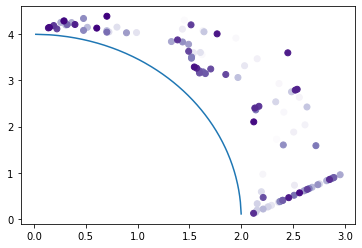

In [12]:
colors = cm.Purples(np.linspace(0, 1, len(opt.y)))
y = y[np.argsort(y[:,0])]
plt.scatter(opt.y[:,0], opt.y[:,1], c = colors)
plt.plot(y[:,0], y[:,1])

In [15]:
opt.y.shape

(110, 2)